In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
df = pd.read_csv('../houseprices.csv')
df.shape

(96, 17)

In [3]:
df.head()

OrganisationLabel                                    OrganisationURI  \
0      Lincolnshire  http://opendatacommunities.org/id/county-counc...   
1      Lincolnshire  http://opendatacommunities.org/id/county-counc...   
2      Lincolnshire  http://opendatacommunities.org/id/county-counc...   
3      Lincolnshire  http://opendatacommunities.org/id/county-counc...   
4      Lincolnshire  http://opendatacommunities.org/id/county-counc...   

         PublishedDate LatestData         DurationFrom           DurationTo  \
0  2018-08-22T00:00:00       True  2018-06-01T00:00:00  2018-06-30T23:59:59   
1  2018-08-22T00:00:00       True  2018-06-01T00:00:00  2018-06-30T23:59:59   
2  2018-08-22T00:00:00       True  2018-06-01T00:00:00  2018-06-30T23:59:59   
3  2018-08-22T00:00:00       True  2018-06-01T00:00:00  2018-06-30T23:59:59   
4  2018-08-22T00:00:00       True  2018-06-01T00:00:00  2018-06-30T23:59:59   

  ReportingPeriodType    Month     GeoEntityName    GeoCode         GeoName  \
0               Month  2018-06  District Council  E07000136          Boston   
1               Month  2018-06  District Council  E07000137    East Lindsey   
2               Month  2018-06  District Council  E07000138         Lincoln   
3               Month  2018-06  District Council  E07000139  North Kesteven   
4               Month  2018-06  District Council  E07000140   South Holland   

                                              GeoURI  AveragePrice  \
0  http://statistics.data.gov.uk/doc/statistical-...        153458   
1  http://statistics.data.gov.uk/doc/statistical-...        169255   
2  http://statistics.data.gov.uk/doc/statistical-...        147578   
3  http://statistics.data.gov.uk/doc/statistical-...        205763   
4  http://statistics.data.gov.uk/doc/statistical-...        185205   

   AveragePriceDetached  AveragePriceSemiDetached  AveragePriceTerraced  \
0                210267                    131631                105835   
1                208535                    144062                114716   
2                235597                    159052                122782   
3                249046                    169806                141247   
4                228877                    157058                128691   

   AveragePriceFlatOrMaisonette  
0                         82069  
1                         86208  
2                        100896  
3                        101705  
4                         86009

In [4]:
df.describe()

AveragePrice  AveragePriceDetached  AveragePriceSemiDetached  \
count      96.000000             96.000000                 96.000000   
mean   174695.531250         232415.989583             153918.614583   
std     20657.431458          26043.738795              17109.067049   
min    142606.000000         197723.000000             122934.000000   
25%    160337.750000         213405.500000             142469.750000   
50%    173248.000000         229160.000000             154733.000000   
75%    189221.500000         237361.750000             160223.500000   
max    213382.000000         300043.000000             192724.000000   

       AveragePriceTerraced  AveragePriceFlatOrMaisonette  
count             96.000000                     96.000000  
mean          124320.781250                  94400.239583  
std            14282.285741                   9058.920326  
min            98900.000000                  77133.000000  
25%           114507.750000                  86614.750000  
50%           124887.500000                  96237.000000  
75%           130628.750000                 100383.000000  
max           155729.000000                 110953.000000

In [5]:
dfToConsider = df.iloc[:,13:17]
dfToConsider.shape

(96, 4)

In [6]:
[m, n] = dfToConsider.shape
dfToConsider.head()

AveragePriceDetached  AveragePriceSemiDetached  AveragePriceTerraced  \
0                210267                    131631                105835   
1                208535                    144062                114716   
2                235597                    159052                122782   
3                249046                    169806                141247   
4                228877                    157058                128691   

   AveragePriceFlatOrMaisonette  
0                         82069  
1                         86208  
2                        100896  
3                        101705  
4                         86009

In [7]:
train = dfToConsider.iloc[:(m-16), :]
test = dfToConsider.iloc[(m-15):, :]

In [8]:
train.shape

(80, 4)

In [9]:
def getScaledFeature(feature):
    featureMean = feature.mean()
    featureMax = feature.max()
    featureMin = feature.min()
    featureRange = featureMax - featureMin
    feature = feature.map(lambda item: (item - featureMean)/ featureRange)
    return feature

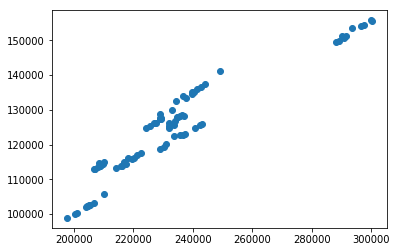

In [10]:
# Get X and y
# train = train[ train['AveragePriceDetached'] < 280000]
X = train['AveragePriceDetached']
y = train['AveragePriceTerraced']
m = len(X)
plt.scatter(X, y)

In [11]:
# Set hypothesis paramters

# y = mx + b (slope formula) ~ theta1.x + theta0
slope = 0
yIntercept = 0
parameters = [yIntercept, slope] # inital slope and y-itercept for hypothesis, [c, m]

In [12]:
class CostClass(object):
    def __init__(self, cost, yIntercept, slope):
        self.cost = cost
        self.yIntercept = yIntercept
        self.slope = slope

In [13]:
def computeCost(m, parameters, x, y):
    [yIntercept, slope] = parameters
    hypothesis = yIntercept + np.dot(x, slope)
    loss = hypothesis - y
    cost = np.sum(loss ** 2) / (2 * len(X))
    return cost

In [14]:
def plotLine(slope, yIntercept, X, y):
    abline_values = [slope * i + yIntercept for i in X]
    plt.scatter(X, y)
    plt.plot(X, abline_values, 'black')
    plt.title(slope)
    plt.show()

In [15]:
costThetaList = []

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, parameters, learning_rate, num_iterations):
    m = len(x)
    theta0Gradient = 0; # initial value
    theta1Gradient = 0; # initial value
    [yIntercept, slope] = parameters
    
    for i in range(0, num_iterations):
        cost = computeCost(m, parameters, x, y)
        costThetaList.append(CostClass(cost, yIntercept, slope)) # adding history data in set for fetching the minimum later
        plotLine(slope, yIntercept, x, y)
        # Appending value in lists for plotting the graph later-on
#         gradientList.append(cost)
#         theta0List.append(theta0)
#         theta1List.append(theta1)
        
        print("Iteration %d | Cost: %f | theta %f %f" % (i, cost, yIntercept, slope))
        hypothesis = yIntercept + np.dot(X, slope)
        loss = hypothesis - y
        theta0Gradient = (1/m) * np.sum(loss)
        theta1Gradient = (1/m) * np.sum(np.dot(loss, X))
        yIntercept = yIntercept - (learning_rate * theta0Gradient)
        slope = slope - (learning_rate * theta1Gradient)
        parameters = [yIntercept, slope]
    return [yIntercept, slope]

In [16]:
# yIntercept = -70000
# slope = 0.85
# parameters = [yIntercept, slope]
print("Starting gradient descent at b = %d, m = %f, error = %f" % (yIntercept, slope, computeCost(m, parameters, X, y)))
# plotLine(slope, yIntercept, X, y)

Starting gradient descent at b = 0, m = 0.000000, error = 7854078351.943750


In [17]:
# Set hyper paramters
learning_rate = 0.1
num_iterations = 500

Running...


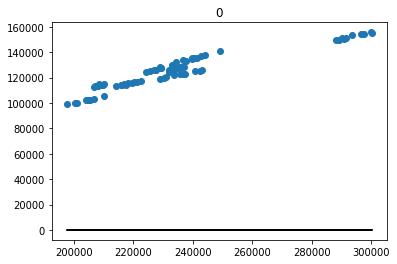

Iteration 0 | Cost: 7854078351.943750 | theta 0.000000 0.000000


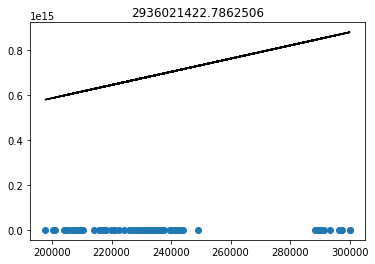

Iteration 1 | Cost: 236847639418122810382612430848.000000 | theta 12450.503750 2936021422.786251


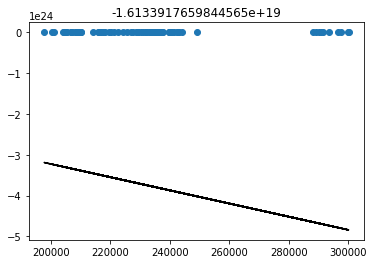

Iteration 2 | Cost: 7152045898820449984796931191804756149966087389184.000000 | theta -68392417004082.664062 -16133917659844564992.000000


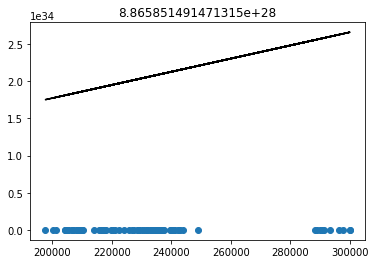

Iteration 3 | Cost: 215969053626634722199146456543151145101618803785075959868363844354048.000000 | theta 375827511386281160474624.000000 88658514914713147175121977344.000000


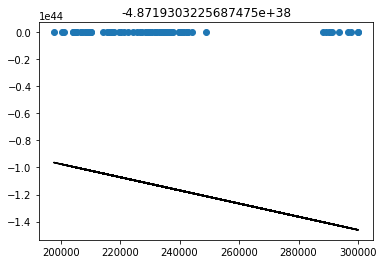

Iteration 4 | Cost: 6521578969743017875310142108155960052575850246998228624300317071898397311462887424786432.000000 | theta -2065233610713811985185012709326848.000000 -487193032256874747878434733727644909568.000000


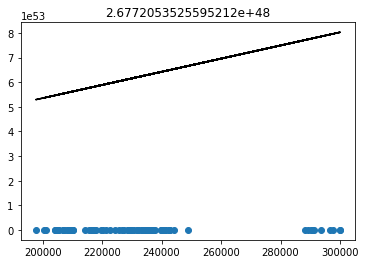

Iteration 5 | Cost: 196930956284697868384851123285473705471560300440150923258341525831640305601042205406774367803397307950432256.000000 | theta 11348796289790997769744166617149841355046912.000000 2677205352559521163712475951505643007375226961920.000000


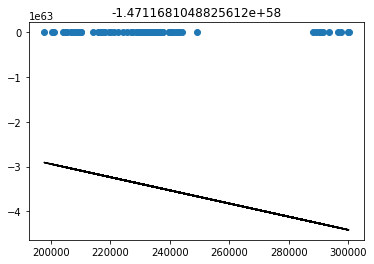

Iteration 6 | Cost: 5946688941916435840325404628294039844030946042858658537091351775059848556295143808803077362083935628154444527588582535435649024.000000 | theta -62363490773645705386425361819379914338911257792348160.000000 -14711681048825611645968608497292094895336504645252643028992.000000


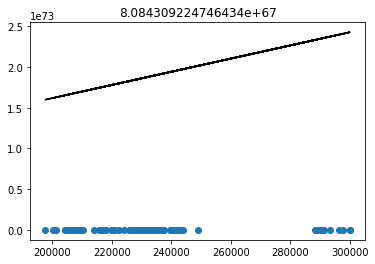

Iteration 7 | Cost: 179571104711377666676758205122804392160722364695879689678626332116042868643122647470778599042839816174852986813207302643309428704580807224520081408.000000 | theta 342697576215478886788408390116196467211117319246551720384266240.000000 80843092247464339977104094110770892093403701155553389880747057217536.000000


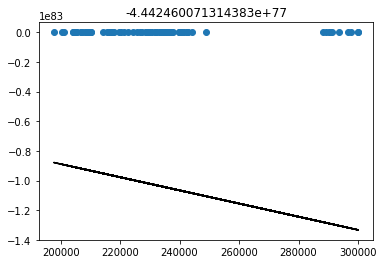

Iteration 8 | Cost: 5422476602058949435895022268369105236723168206677037973859517978212961125170666172257605724942942334166916280791291770094062238433004403212722521378228286573370146816.000000 | theta -1883179201277068848124622709718449497630822438577750717488306306477457408.000000 -444246007131438323645127562483409182387224914995277844535825781731347178455040.000000


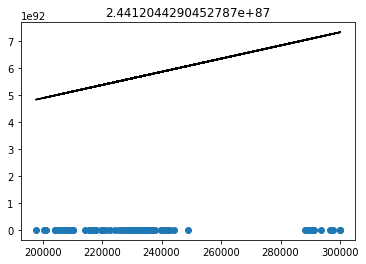

Iteration 9 | Cost: 163741558237536295559882820788908979926004370938383591331164974244899795374943281553813112119685718764310735886774858116416574402107079995347366084807020299051629984552422609662775394304.000000 | theta 10348377549926646086940798786667877797569847409062553530325752359359297912980897792.000000 2441204429045278729663285203645292371802827234100189294713758632864681911751959998627840.000000


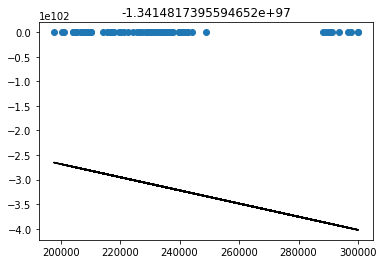

Iteration 10 | Cost: 4944474612186627407103116127639303457072920668963787267207251902717360271149654129796664734375859440998612024014869132119426028437086946247185394864684522102277108654602690198045244270400199188239100149760.000000 | theta -56866026261974456906889003567100935756100535480832538537097455736552516756959503601132109824.000000 -13414817395594651569702572437874168015626509115070766911800997087161412759002723823378613483339776.000000


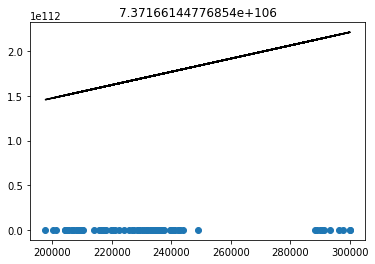

Iteration 11 | Cost: 149307417455330348263137501753758717403652982843186052660423679750061810858157665657680327147864499765238632737354114388698828396860153585867139805666929185683190869335117233227087450258724071203953225710941832854208186941440.000000 | theta 312488110066151243969007186328941420146705188091841437928760797839178305014065096989360493690628341760.000000 73716614477685404277726222693232750485621561699317224457239879685146063998961452827072613007953534616862720.000000


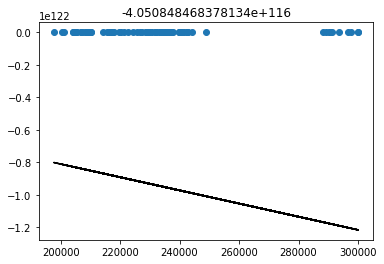

Iteration 12 | Cost: 4508609438955457683460064259656168169925543763783280670427173783370917559084168866217590197216489698128901386582946864631497099572034882175819133331987764320906771882968399301914990453498339403083124644840832064032348870408065367763425907703808.000000 | theta -1717173246515583849631723995052872596095183755045926985826697136137834024664555577088571519501142507860854308864.000000 -405084846837813385872226847660972284092582938050621007478304957311456633951458982992094421078476165849252435071074304.000000


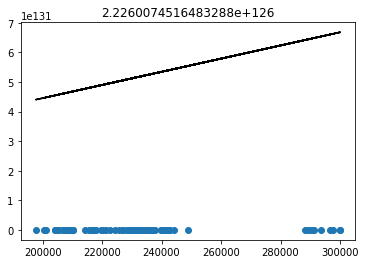

Iteration 13 | Cost: 136145674605348024854274209522886619965392722565001066150993767831037417899720308871931500004426911172483837155989043169372795238667270635862416762560093465001876973441216169282478659341041953527305020320713855295845350109371327132125927010138414201260654186201088.000000 | theta 9436147691906277533801463022584120347687583057404895800862246751782953372084467227081171132469139422270475048079096545280.000000 2226007451648328810152404356937777061558119416182435737812026979989470355938691540751714797940112524401993725064698332230713344.000000


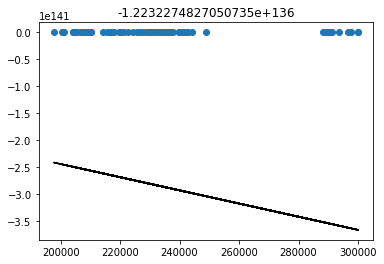

Iteration 14 | Cost: 4111166639006903400009380551289256812079745594941643412054123084561845322907619900507660331612426056700161352853802573473265358072167002908307498617529221666562576536631823983668508949299854654380676823547673995345925237079681296005979940539172191612441381678788824268137136222371840.000000 | theta -51853174072066554171335567599939692656461288110612848795848265598862638287587668324622686026508548641527307693758939320887336239104.000000 -12232274827050735165908781378831259828455262101511465346365037589497487102304252194336619015009308607051530382348993451569098611492913152.000000


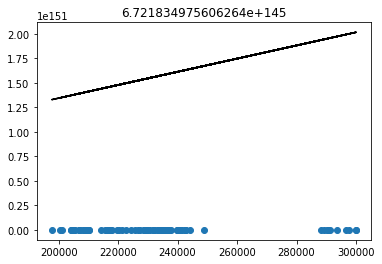

Iteration 15 | Cost: 124144165304384789661318387479350265185530499890045537013176043563162975094044567249981184633385918306215358587912767104283134542096319477134749856378163681796974315115812689758754968887767987160136239608962654549102863667619021866388098094361816696970762123662191511615218900993518353189123800013209600.000000 | theta 284941667843358793465008905625350544516135451732207015313942874119353694051312317658547091177476206512888630898763995140217731855351845748736.000000 67218349756062641239093561460047427267000532644527578299883957003022487937193171131812264665505432095294043934063172619379760175547587544018321408.000000


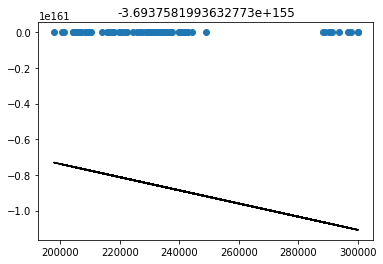

Iteration 16 | Cost: inf | theta -1565801043548714883712645986186374282156527735589239838234827503293822087505712553544123058939864387022754162482238970841562571326057944801522300747776.000000 -369375819936327731286417938754971313763015699925180227351364363240473610552668807133387353674546227660667414055681313716629516209510910543030977054071848960.000000


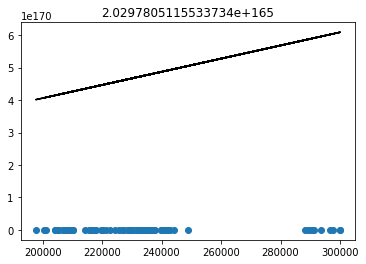

Iteration 17 | Cost: inf | theta 8604332692142584361599132903613752635059010873106982009944715197503324130690834908433692760766694698561502263059838334833350389313031022910470371926331432632320.000000 2029780511553373445144353985538008963175099456523240990890982950743350997123404570959733549093525424038751092840885212207059760814190689409014886878814167434000334848.000000


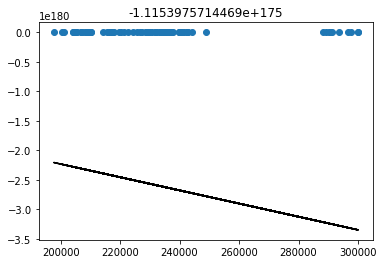

Iteration 18 | Cost: inf | theta -47282214673508267985917606205795745076035575081313173983185791826982424230552884876143102363709652435433290858155554449683668057772251859616302073040503463621802640539648.000000 -11153975714469000428864912284368116404514940116125912198692409325409978495650829425396830719814743176602877689322973623369933636055394809854291418871091788394877511447064084480.000000


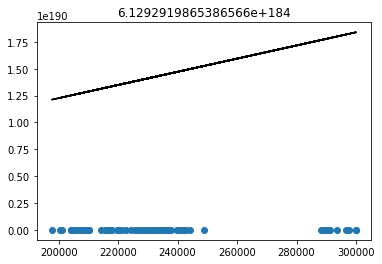

Iteration 19 | Cost: inf | theta 259823498744215587874343304896276875580418078225659420148207085894480318963426642785190567751312796707992231211351609165944063017285478412024603847370939034462790802896602823393280.000000 61292919865386565676573291524305011485132307035150042364568835072386116454193007169788484156730859869380520775927020362434917384237332404292571453359256581235383440207329922366390140928.000000


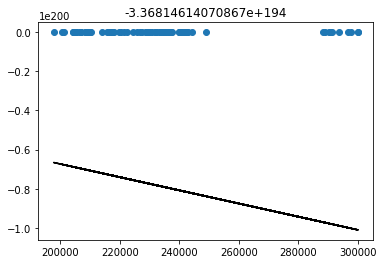

Iteration 20 | Cost: inf | theta -1427772598340439866803837221330714116858354035357029405267811303665216060978334448047425326577337017797241779934788940787737417417216948918726357626244527228104103658867454769795548378562560.000000 -336814614070866989425446159930234697340074128763191332095544419996915727366452662655229521830871782657121129174963756069065481345189139720186526630342077469349359692536257356636878706479359590400.000000


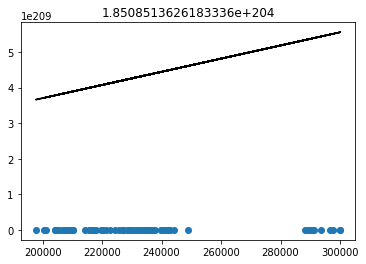

Iteration 21 | Cost: inf | theta 7845843822535299811882641954002168091047573001852063703568183330803144756224418413154153574335793480110944274327706195299095167624589635258455588307693479608712847616735169344159895296233658006896640.000000 1850851362618333572198604093960471092535589072965498108057535640556903095909868285244664802948503657953274547300469755321607500073140505656996506046771229310070288300591572411611378290470022476673222443008.000000


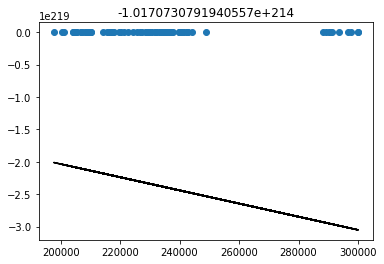

Iteration 22 | Cost: inf | theta -43114194346610851011111410583044179729729722194005856473883984873510527112604206055987188774697201533544599957514081046447253839169377123466724362591735578304013592365022606717058404976445890715838624238141440.000000 -10170730791940557388416077811383489473428078908274634636692447548339104674629248465556796473839751434633267413894549892819305427365086790070882739806770592781027344105287557297890934222167075757656203511281836097536.000000


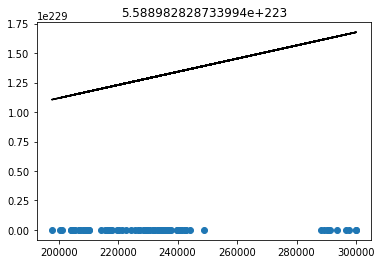

Iteration 23 | Cost: inf | theta 236919545711358562317903582522730374930254000379526554910756581908217198036527238718548625231863237543073743500476998386874404632187590317385318251436431393854916098644995991857026674156374510590718192617714271043715072.000000 55889828287339942488688649054023258043246451601455197193520658414673548405451909182572812557728588464815431348534966925483559933677930949708965365741652309506863521076021094109252967450657385558470236727374606787526573162496.000000


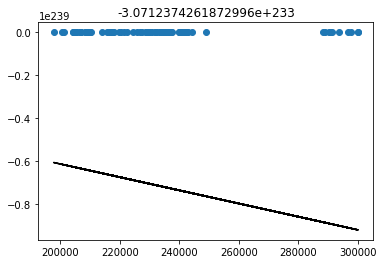

Iteration 24 | Cost: inf | theta -1301911632369140999259845496220217894478759624763416120327864786181205296954721815018837402523900841139166527643612819686740163784765947883501661344458504208316179222410209448038396805515096608819478855898382590264302077902585856.000000 -307123742618729964729498538065648719656163549404865789458498617292853920252366818356542240869510223370153934155035738748979898377794136593400974119271319087379451102716394362021847593256238668918070663552529010898304353908666438516736.000000


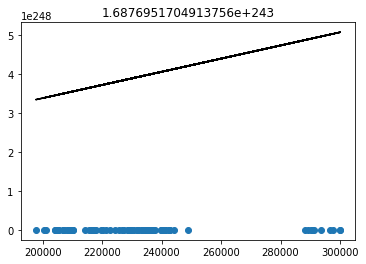

Iteration 25 | Cost: inf | theta 7154217240324631298772704879525518038608475528370086097895447417661159334457049976690441058696576586734055581717631115027712795110611500128810043229908132191614165489492351956749450004660143576553592454968546088338128816661971903228936192.000000 1687695170491375603758984919976475519225438633241444677232545888292400701489363401293285782867338913445678247010357505335949392048794496098634008450333768290016443582439148320649642752891135256390381157662953376140189205073329556834560744882176.000000


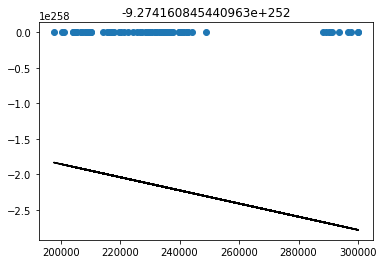

Iteration 26 | Cost: inf | theta -39313593218779944007062250726249436376068914267766416227491197575249968461575550016398448065935270275218983904309941577051935000876084986975949618609997721338935447787022374546310753873270465883871506995620729188288315530199311938997633964136464384.000000 -9274160845440962685054261038003320463968011357021060510251224882590060344148579612212035044965623364130737484059272275629191099858943582327787194769699830829040582438389571718617210045677113739524038734349943261468319099649196661656136542629501136273408.000000


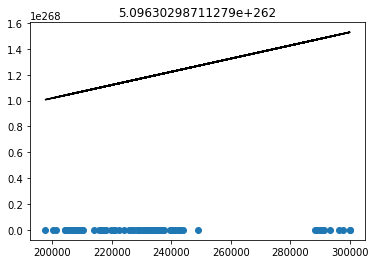

Iteration 27 | Cost: inf | theta 216034621238530901583283154356955545196544374285876675248622635143170915910099626206704098173365398873457902327627458466649377668146064806648881455375163528208643851283954281766995000168281096030079560297874504779481757237365553702478106476274157424130129920.000000 50963029871127901248905023077904436395047746886773336791658665515477500509602810998465225783317142916694228979912399530188438495222779812123074401441353621421486132634665516266695732415960616096508473440023655433304494603701763633183737904424458898064637610164224.000000


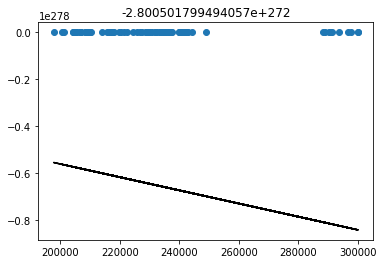

Iteration 28 | Cost: inf | theta -1187145558381089831064202212570220295528422686003507295201993656403792511799685195590070297877300131870222623444902491977562616573228768407358183722283602711909026617258286674564311322268667204372326309841505388949171089341463615988411695945937334168694315313119887360.000000 -280050179949405703396678868619600870185596868966991774363374055281459836310865992294898065494297621132157768014759840249030968240824490305049613005998824923079308591494144422078472927489849896120925029130144980187945737745061371114758304619703171906845334604116069328093184.000000


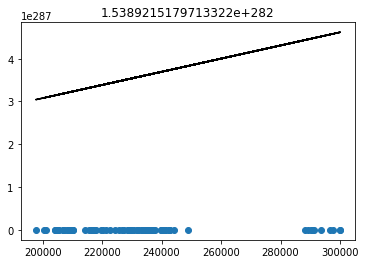

Iteration 29 | Cost: inf | theta 6523558903218013690315861104024095260317403357168210707696958474665318349265384250095825486258897516981986090563241179483963814314932467087136195052575017626874357986341247627064730544561006643754927909540177485047487649665123211402308915886122024998946426684080655297832550400.000000 1538921517971332160152159319551327331018478639066038798435943168126432443570449517122644703288241060028810060398771661624806176265598946592373101784579639620837337805694473810201493471705578656593762753459505815335135420076961526703477852993984635835423276383825772513746829650690048.000000


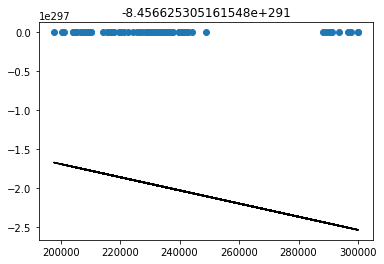

Iteration 30 | Cost: inf | theta -35848022564132497531196924820640810025593187643248923105630311272378930212559396587821406760152315426162901173859968221619722117988264825714501493779277264361806996667271374777591534162529824095618089270448594754080038380900651645712536568074700962607563414594608172650848996103429292032.000000 -8456625305161547671208838465199967517793410757435703659118183064291109878578456609502891863553362702996908125605965128981376584657350414667948232170941020150568409877134233605703808768794173158583382923787929213302676328279104894594701329077112766557674105250687399258976882210105990173425664.000000


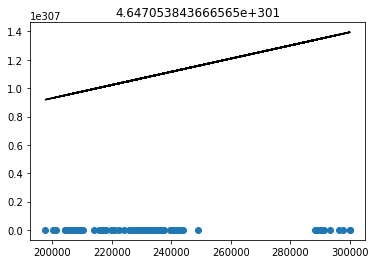

Iteration 31 | Cost: inf | theta 196990743982496189672676816292190671473726405599807489830369782043718962187351774033868304439613775586518362599002003332065501707798615153991949332670860935383131854651967406070236988272334873426326684294079743446160150863960763789376676070588434579637318106513349186784666410832500510447217147904.000000 46470538436665652361181477096796282290178471547898209193232481113451745492097785042225647443847537654543640827962789858966393318924297578163612712507365352604408248312711186668518975846512483333496028686993652200049455411677683491872942742475557229822127283775692780807088775106086257895594660080910336.000000


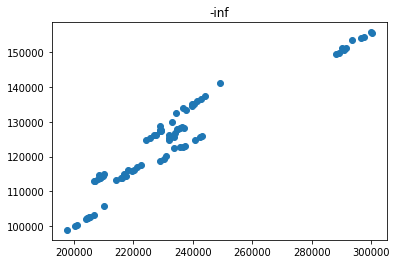

Iteration 32 | Cost: inf | theta -inf -inf


/home/mukul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/home/mukul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


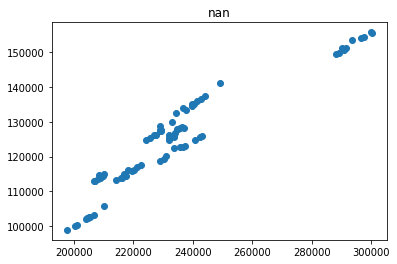

Iteration 33 | Cost: 0.000000 | theta nan nan


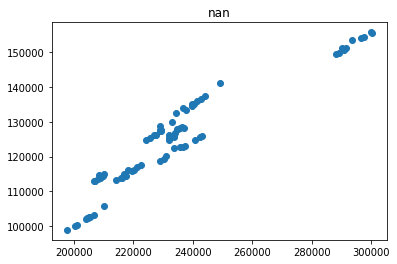

Iteration 34 | Cost: 0.000000 | theta nan nan


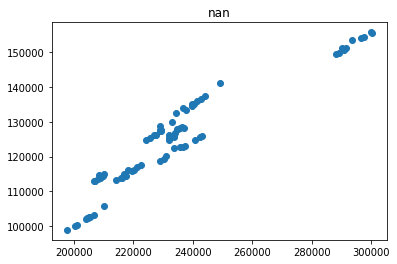

Iteration 35 | Cost: 0.000000 | theta nan nan


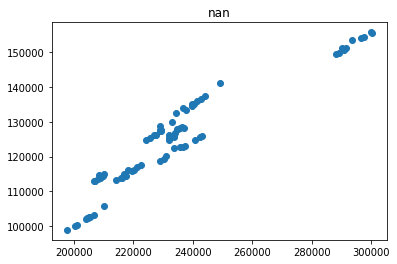

Iteration 36 | Cost: 0.000000 | theta nan nan


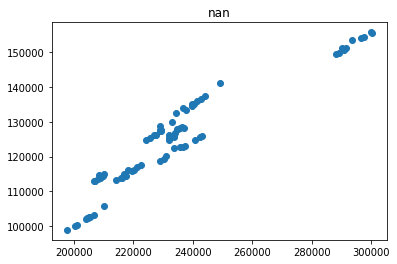

Iteration 37 | Cost: 0.000000 | theta nan nan


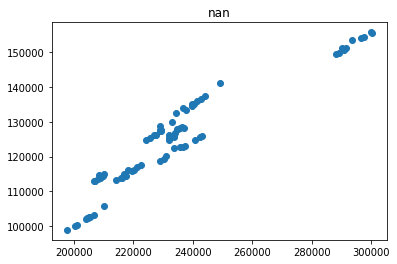

Iteration 38 | Cost: 0.000000 | theta nan nan


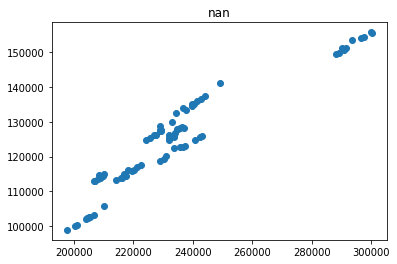

Iteration 39 | Cost: 0.000000 | theta nan nan


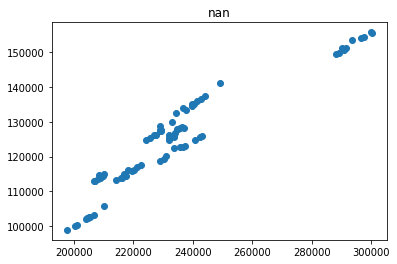

Iteration 40 | Cost: 0.000000 | theta nan nan


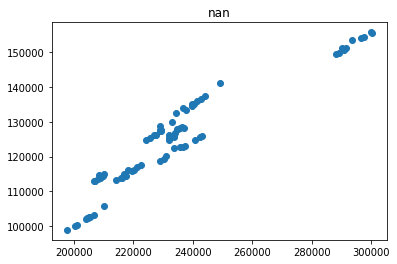

Iteration 41 | Cost: 0.000000 | theta nan nan


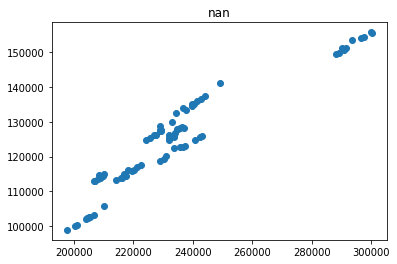

Iteration 42 | Cost: 0.000000 | theta nan nan


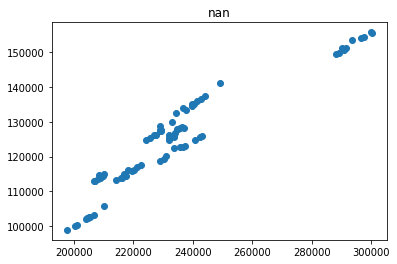

Iteration 43 | Cost: 0.000000 | theta nan nan


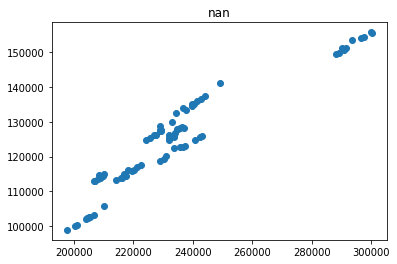

Iteration 44 | Cost: 0.000000 | theta nan nan


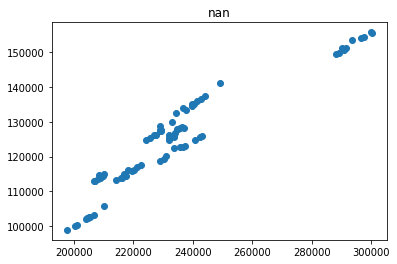

Iteration 45 | Cost: 0.000000 | theta nan nan


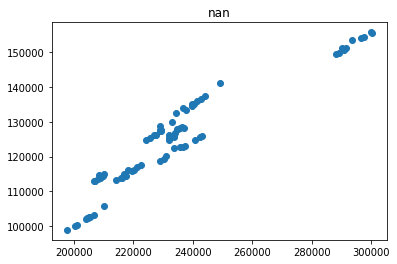

Iteration 46 | Cost: 0.000000 | theta nan nan


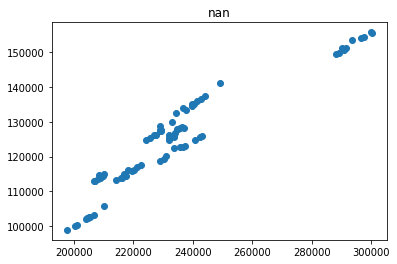

Iteration 47 | Cost: 0.000000 | theta nan nan


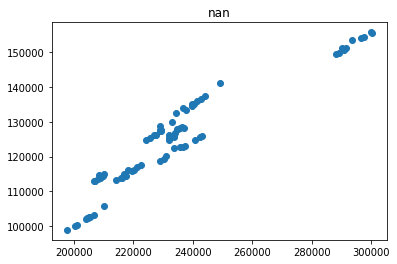

Iteration 48 | Cost: 0.000000 | theta nan nan


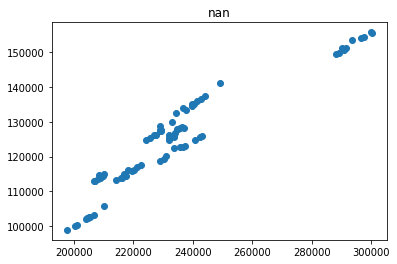

Iteration 49 | Cost: 0.000000 | theta nan nan


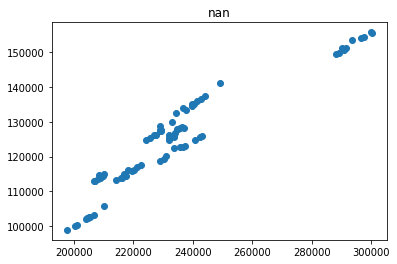

Iteration 50 | Cost: 0.000000 | theta nan nan


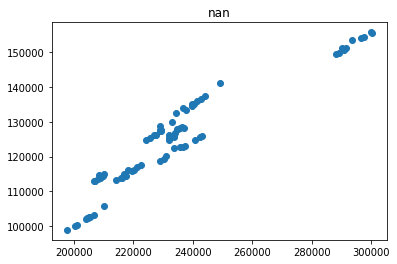

Iteration 51 | Cost: 0.000000 | theta nan nan


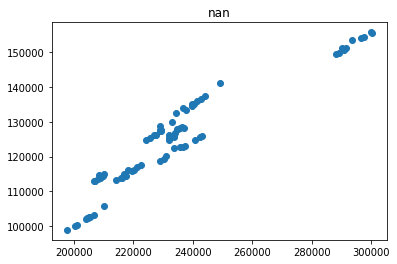

Iteration 52 | Cost: 0.000000 | theta nan nan


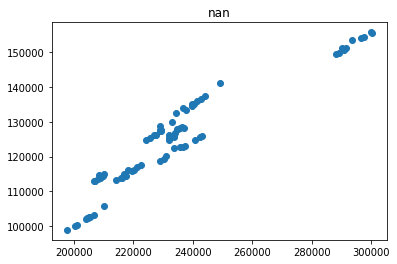

Iteration 53 | Cost: 0.000000 | theta nan nan


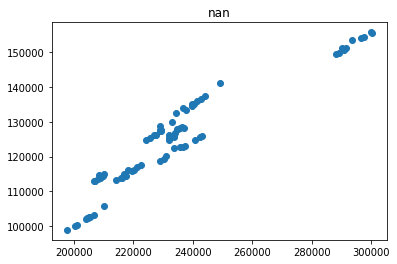

Iteration 54 | Cost: 0.000000 | theta nan nan


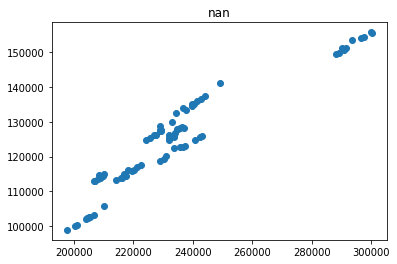

Iteration 55 | Cost: 0.000000 | theta nan nan


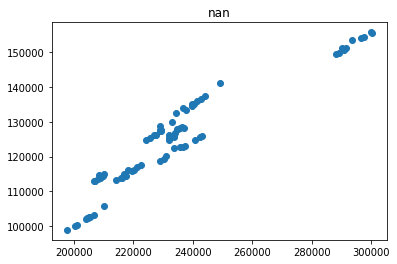

Iteration 56 | Cost: 0.000000 | theta nan nan


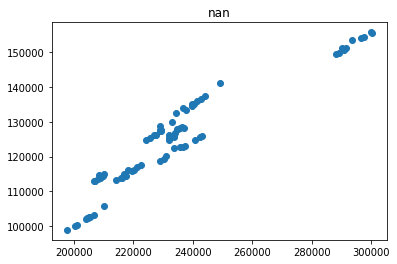

Iteration 57 | Cost: 0.000000 | theta nan nan


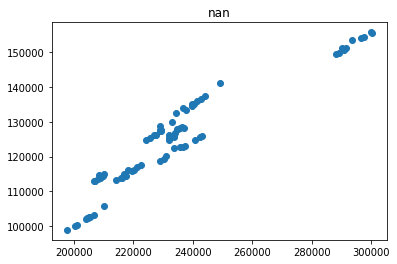

Iteration 58 | Cost: 0.000000 | theta nan nan


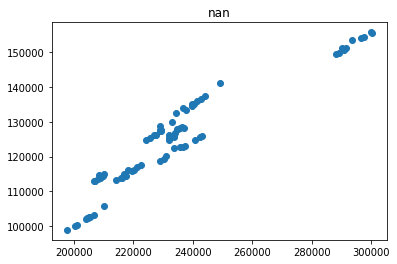

Iteration 59 | Cost: 0.000000 | theta nan nan


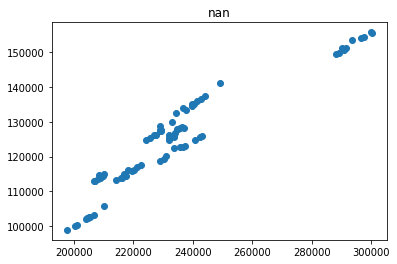

Iteration 60 | Cost: 0.000000 | theta nan nan


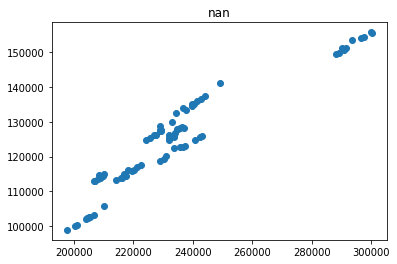

Iteration 61 | Cost: 0.000000 | theta nan nan


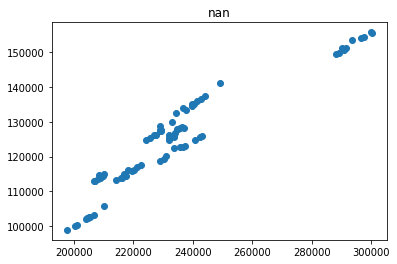

Iteration 62 | Cost: 0.000000 | theta nan nan


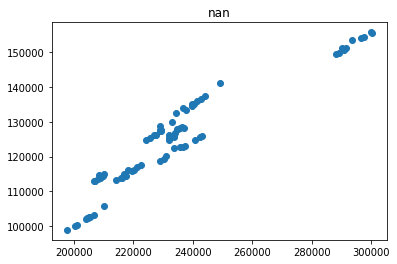

Iteration 63 | Cost: 0.000000 | theta nan nan


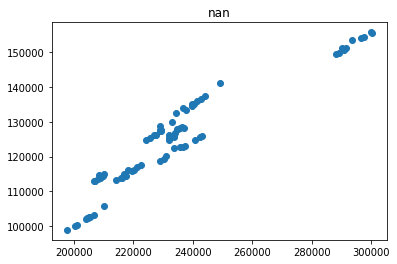

Iteration 64 | Cost: 0.000000 | theta nan nan


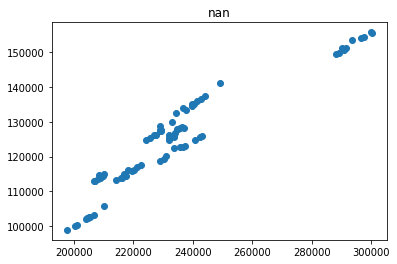

Iteration 65 | Cost: 0.000000 | theta nan nan


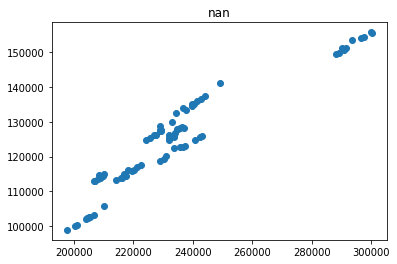

Iteration 66 | Cost: 0.000000 | theta nan nan


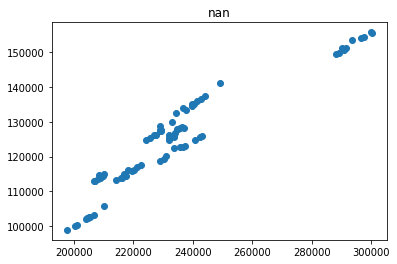

Iteration 67 | Cost: 0.000000 | theta nan nan


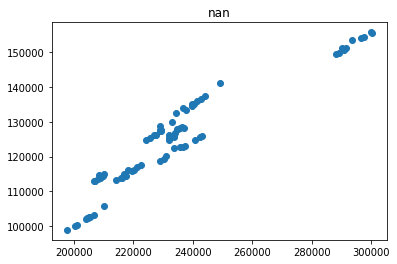

Iteration 68 | Cost: 0.000000 | theta nan nan


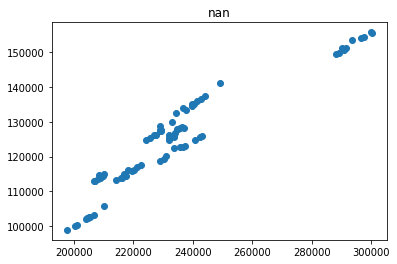

Iteration 69 | Cost: 0.000000 | theta nan nan


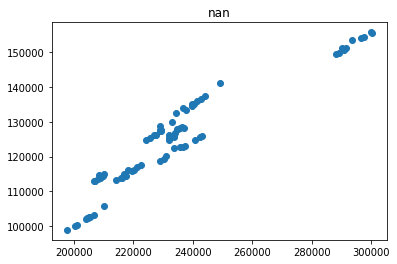

Iteration 70 | Cost: 0.000000 | theta nan nan


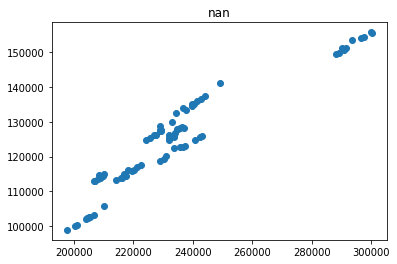

Iteration 71 | Cost: 0.000000 | theta nan nan


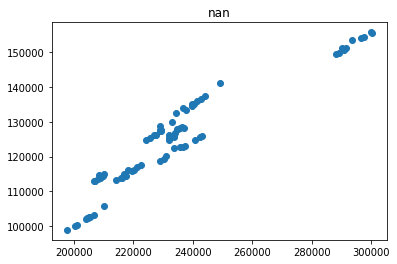

Iteration 72 | Cost: 0.000000 | theta nan nan


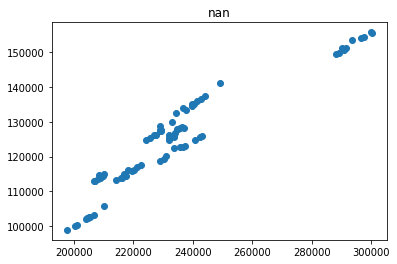

Iteration 73 | Cost: 0.000000 | theta nan nan


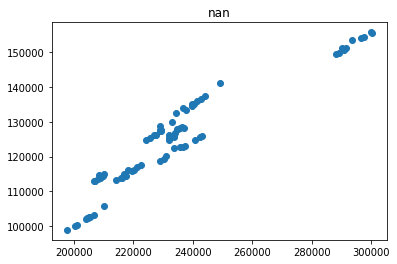

Iteration 74 | Cost: 0.000000 | theta nan nan


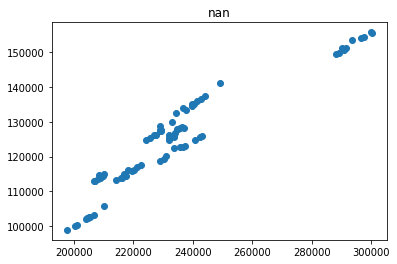

Iteration 75 | Cost: 0.000000 | theta nan nan


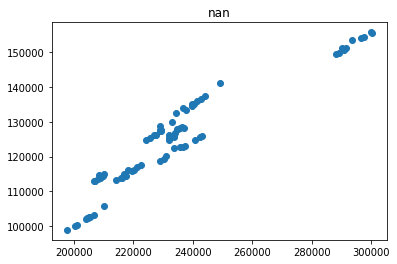

Iteration 76 | Cost: 0.000000 | theta nan nan


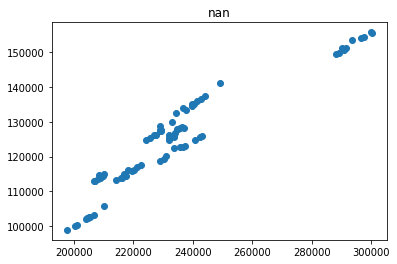

Iteration 77 | Cost: 0.000000 | theta nan nan


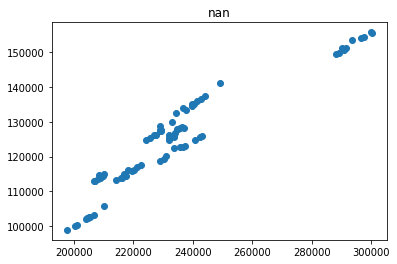

Iteration 78 | Cost: 0.000000 | theta nan nan


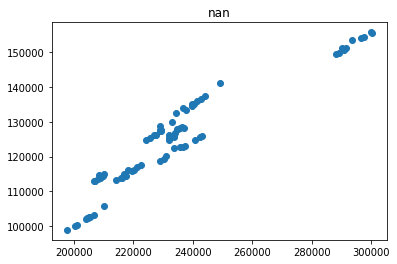

Iteration 79 | Cost: 0.000000 | theta nan nan


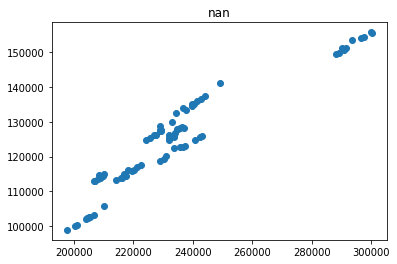

Iteration 80 | Cost: 0.000000 | theta nan nan


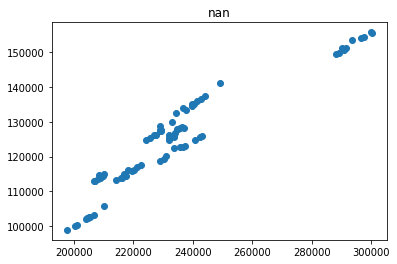

Iteration 81 | Cost: 0.000000 | theta nan nan


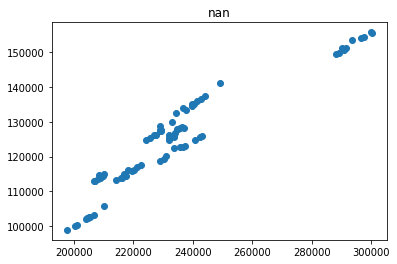

Iteration 82 | Cost: 0.000000 | theta nan nan


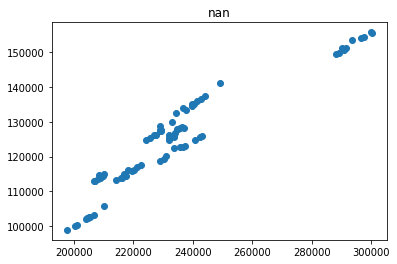

Iteration 83 | Cost: 0.000000 | theta nan nan


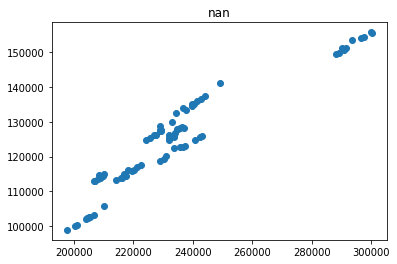

Iteration 84 | Cost: 0.000000 | theta nan nan


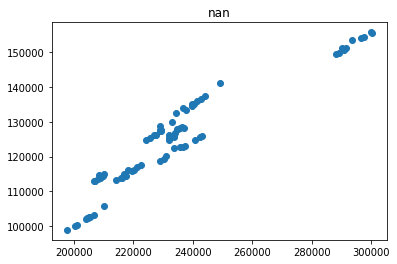

Iteration 85 | Cost: 0.000000 | theta nan nan


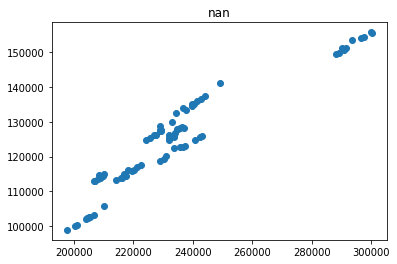

Iteration 86 | Cost: 0.000000 | theta nan nan


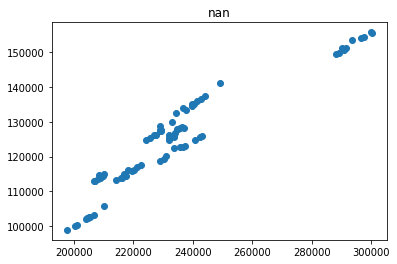

Iteration 87 | Cost: 0.000000 | theta nan nan


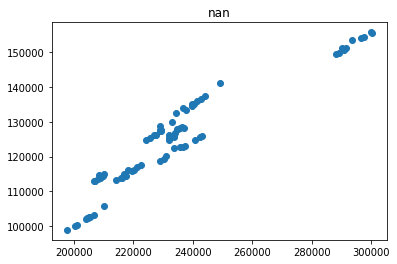

Iteration 88 | Cost: 0.000000 | theta nan nan


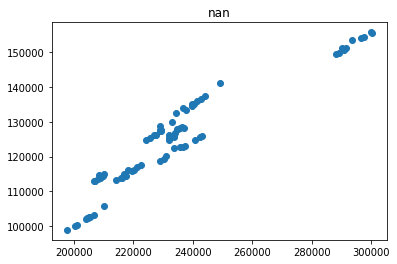

Iteration 89 | Cost: 0.000000 | theta nan nan


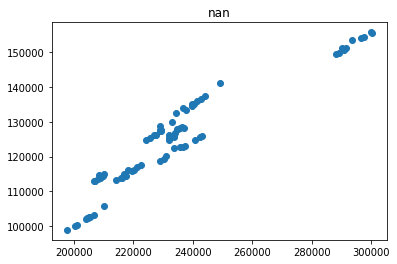

Iteration 90 | Cost: 0.000000 | theta nan nan


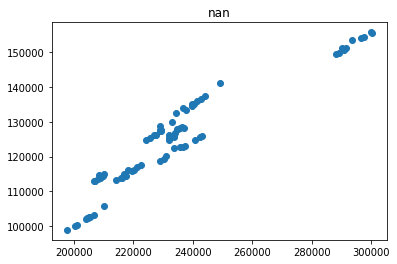

Iteration 91 | Cost: 0.000000 | theta nan nan


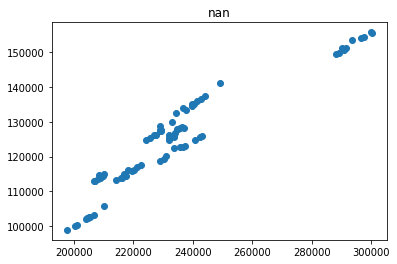

Iteration 92 | Cost: 0.000000 | theta nan nan


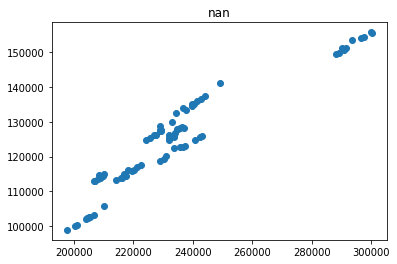

Iteration 93 | Cost: 0.000000 | theta nan nan


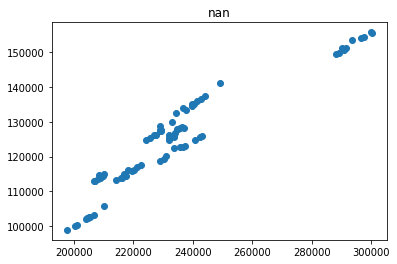

Iteration 94 | Cost: 0.000000 | theta nan nan


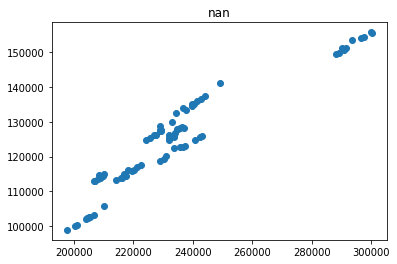

Iteration 95 | Cost: 0.000000 | theta nan nan


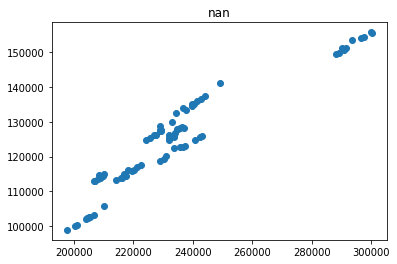

Iteration 96 | Cost: 0.000000 | theta nan nan


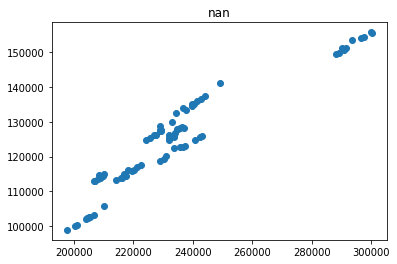

Iteration 97 | Cost: 0.000000 | theta nan nan


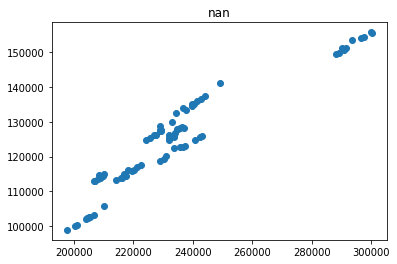

Iteration 98 | Cost: 0.000000 | theta nan nan


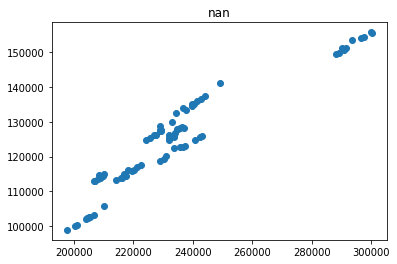

Iteration 99 | Cost: 0.000000 | theta nan nan


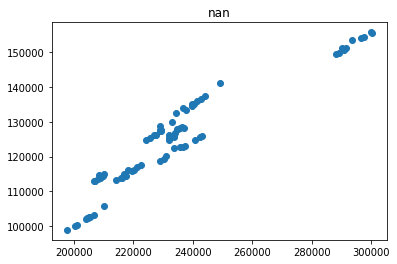

Iteration 100 | Cost: 0.000000 | theta nan nan


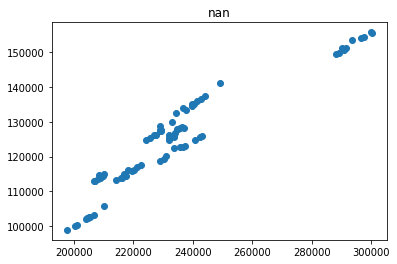

Iteration 101 | Cost: 0.000000 | theta nan nan


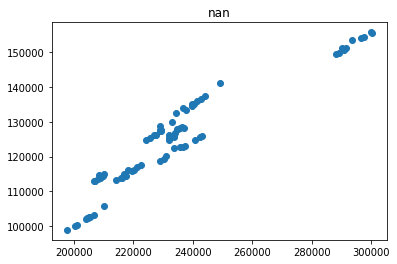

Iteration 102 | Cost: 0.000000 | theta nan nan


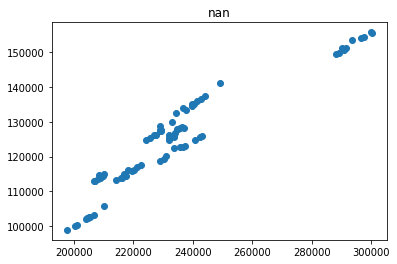

Iteration 103 | Cost: 0.000000 | theta nan nan


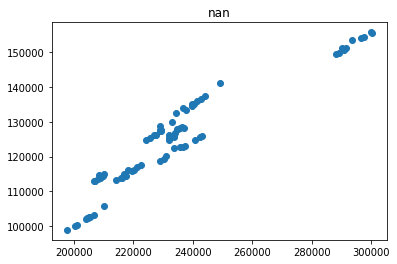

Iteration 104 | Cost: 0.000000 | theta nan nan


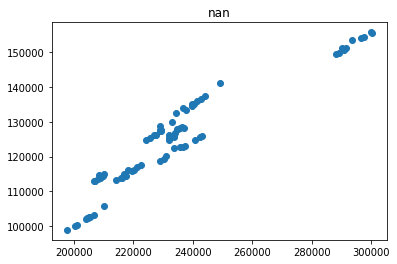

Iteration 105 | Cost: 0.000000 | theta nan nan


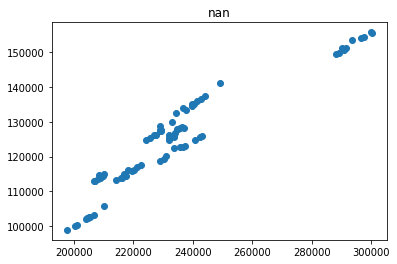

Iteration 106 | Cost: 0.000000 | theta nan nan


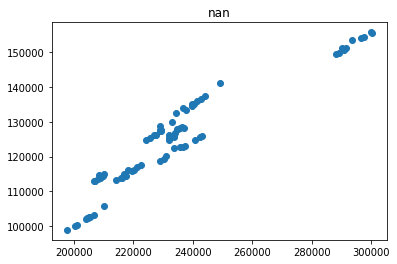

Iteration 107 | Cost: 0.000000 | theta nan nan


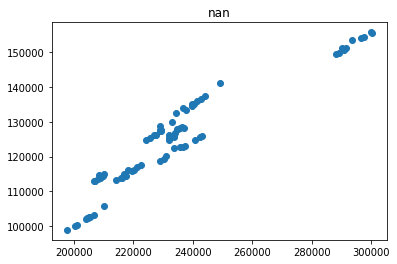

Iteration 108 | Cost: 0.000000 | theta nan nan


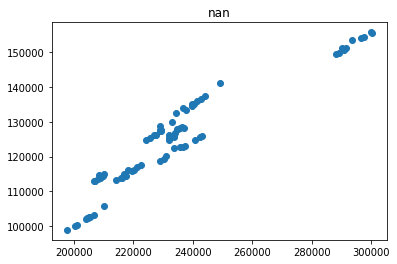

Iteration 109 | Cost: 0.000000 | theta nan nan


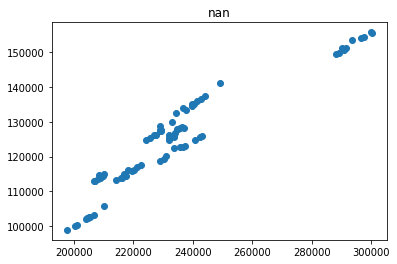

Iteration 110 | Cost: 0.000000 | theta nan nan


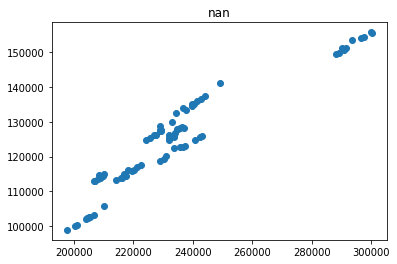

Iteration 111 | Cost: 0.000000 | theta nan nan


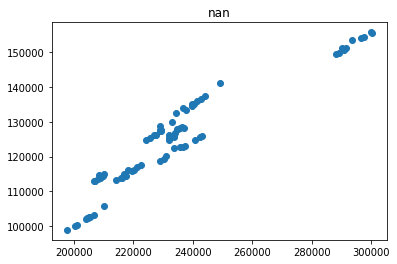

Iteration 112 | Cost: 0.000000 | theta nan nan


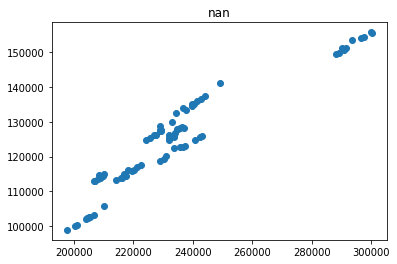

Iteration 113 | Cost: 0.000000 | theta nan nan


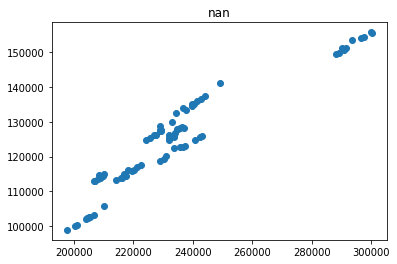

Iteration 114 | Cost: 0.000000 | theta nan nan


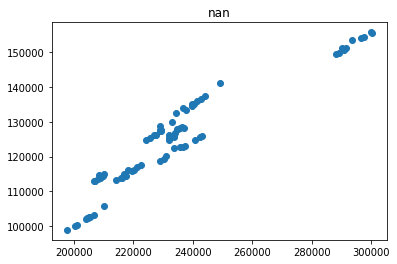

Iteration 115 | Cost: 0.000000 | theta nan nan


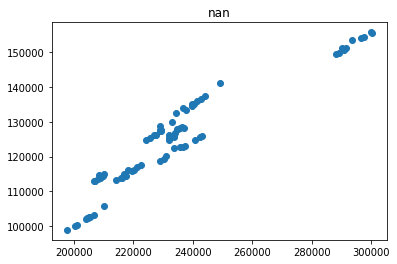

Iteration 116 | Cost: 0.000000 | theta nan nan


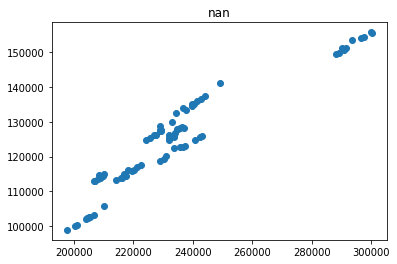

Iteration 117 | Cost: 0.000000 | theta nan nan


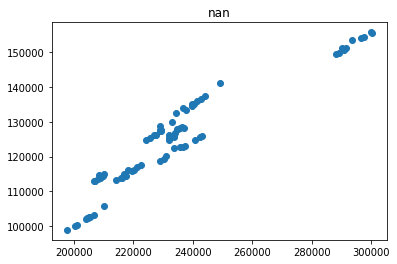

Iteration 118 | Cost: 0.000000 | theta nan nan


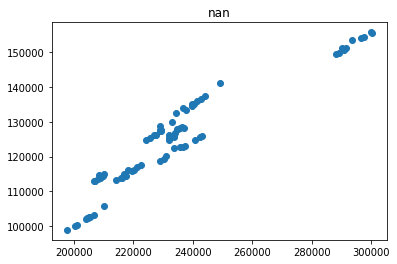

Iteration 119 | Cost: 0.000000 | theta nan nan


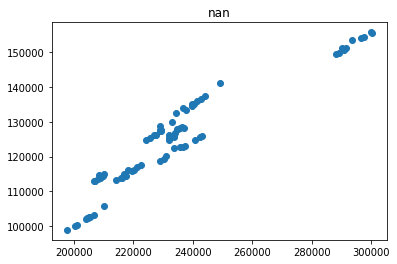

Iteration 120 | Cost: 0.000000 | theta nan nan


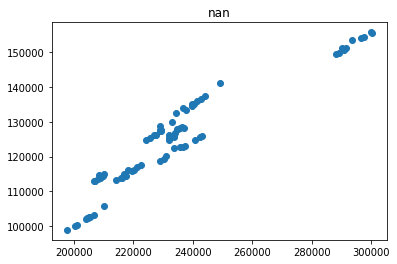

Iteration 121 | Cost: 0.000000 | theta nan nan


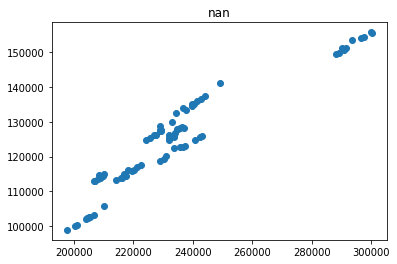

Iteration 122 | Cost: 0.000000 | theta nan nan


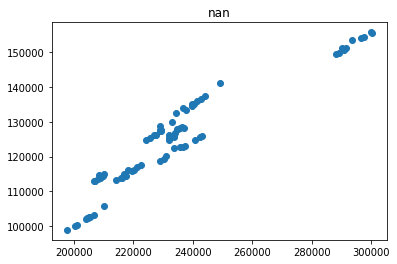

Iteration 123 | Cost: 0.000000 | theta nan nan


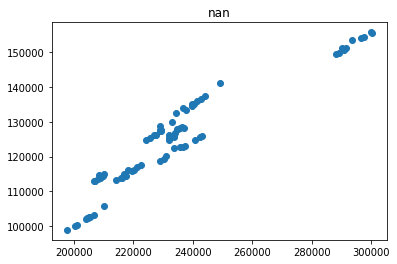

Iteration 124 | Cost: 0.000000 | theta nan nan


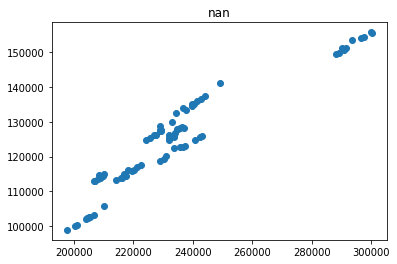

Iteration 125 | Cost: 0.000000 | theta nan nan


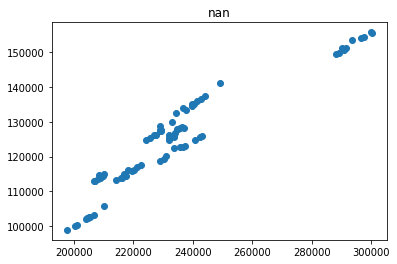

Iteration 126 | Cost: 0.000000 | theta nan nan


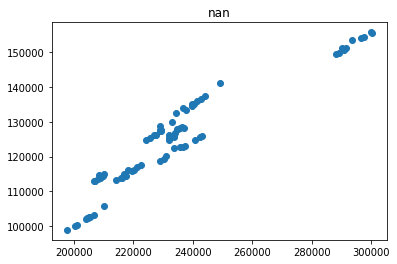

Iteration 127 | Cost: 0.000000 | theta nan nan


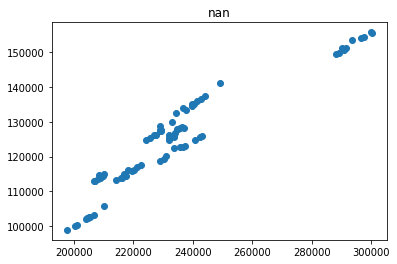

Iteration 128 | Cost: 0.000000 | theta nan nan


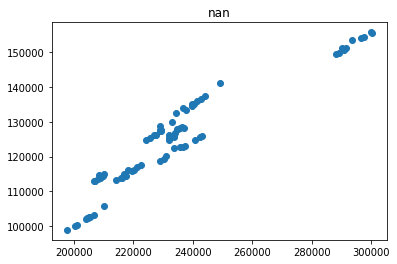

Iteration 129 | Cost: 0.000000 | theta nan nan


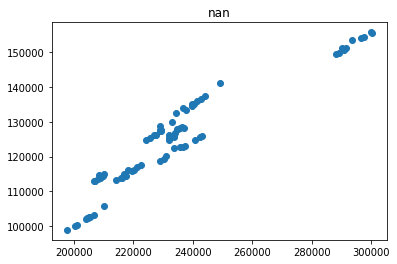

Iteration 130 | Cost: 0.000000 | theta nan nan


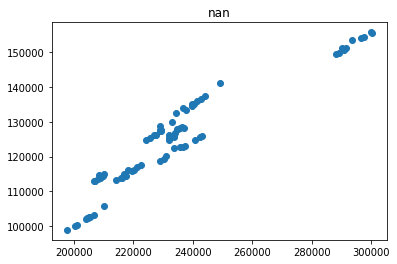

Iteration 131 | Cost: 0.000000 | theta nan nan


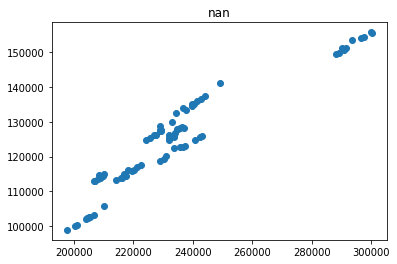

Iteration 132 | Cost: 0.000000 | theta nan nan


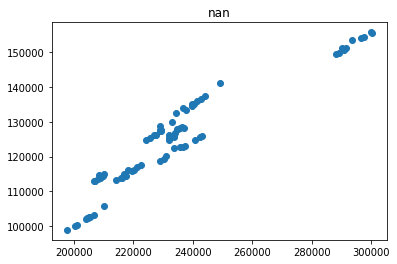

Iteration 133 | Cost: 0.000000 | theta nan nan


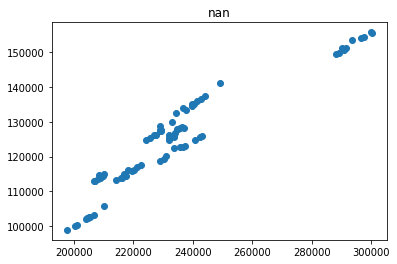

Iteration 134 | Cost: 0.000000 | theta nan nan


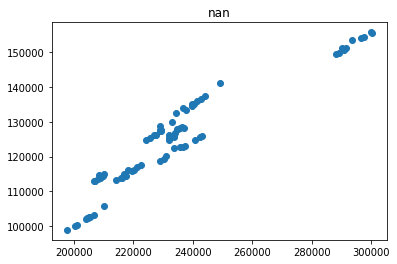

Iteration 135 | Cost: 0.000000 | theta nan nan


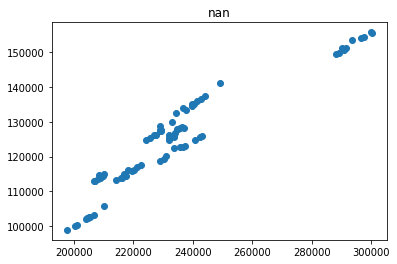

Iteration 136 | Cost: 0.000000 | theta nan nan


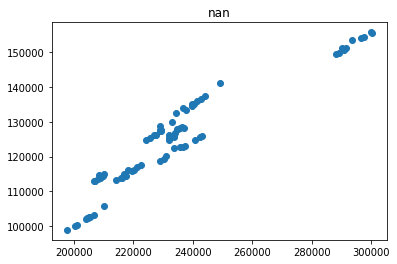

Iteration 137 | Cost: 0.000000 | theta nan nan


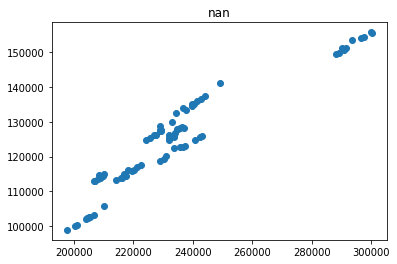

Iteration 138 | Cost: 0.000000 | theta nan nan


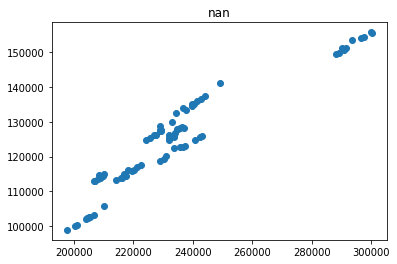

Iteration 139 | Cost: 0.000000 | theta nan nan


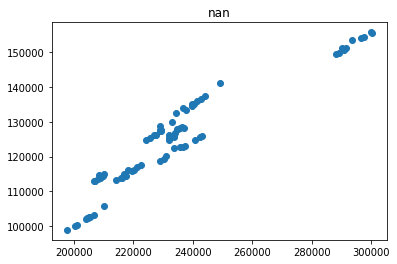

Iteration 140 | Cost: 0.000000 | theta nan nan


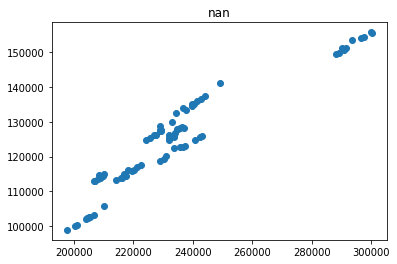

Iteration 141 | Cost: 0.000000 | theta nan nan


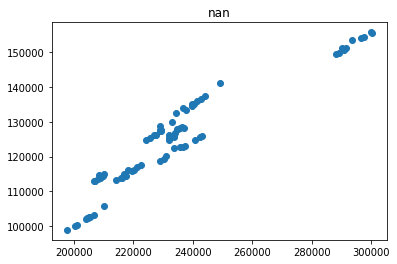

Iteration 142 | Cost: 0.000000 | theta nan nan


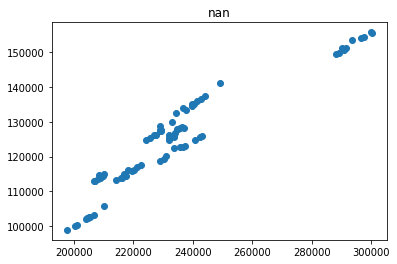

Iteration 143 | Cost: 0.000000 | theta nan nan


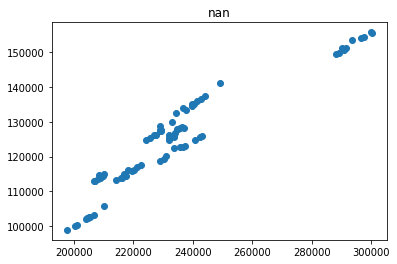

Iteration 144 | Cost: 0.000000 | theta nan nan


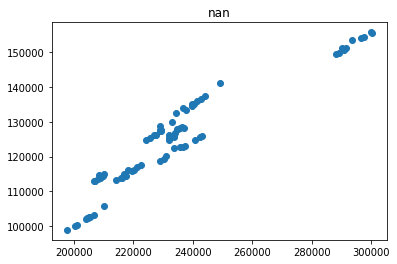

Iteration 145 | Cost: 0.000000 | theta nan nan


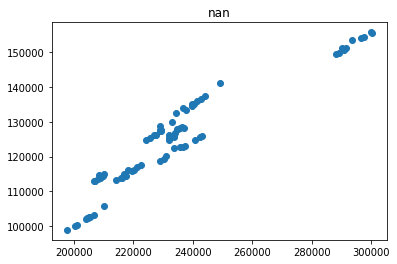

Iteration 146 | Cost: 0.000000 | theta nan nan


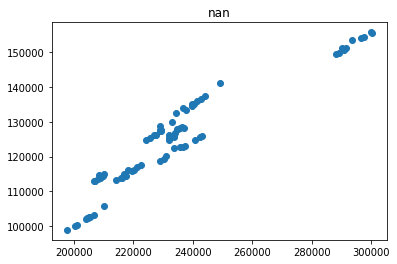

Iteration 147 | Cost: 0.000000 | theta nan nan


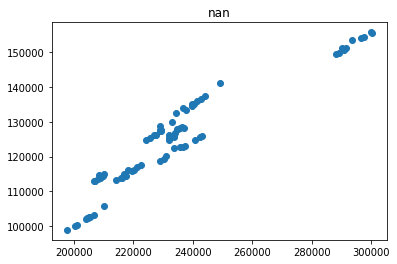

Iteration 148 | Cost: 0.000000 | theta nan nan


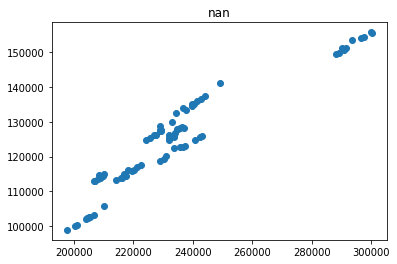

Iteration 149 | Cost: 0.000000 | theta nan nan


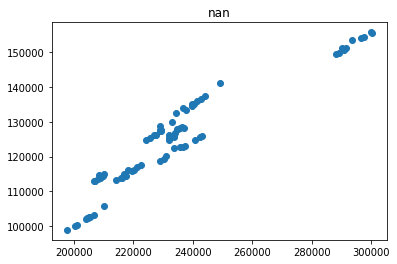

Iteration 150 | Cost: 0.000000 | theta nan nan


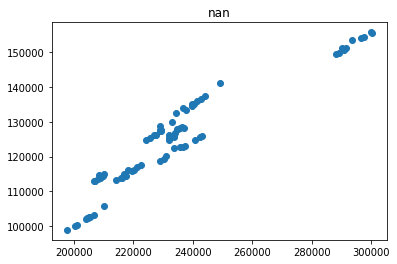

Iteration 151 | Cost: 0.000000 | theta nan nan


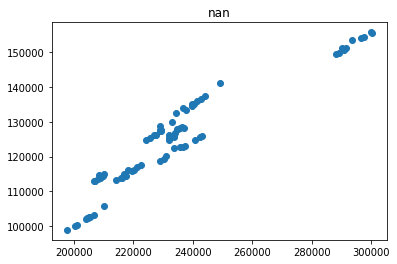

Iteration 152 | Cost: 0.000000 | theta nan nan


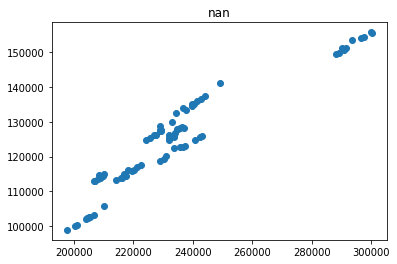

Iteration 153 | Cost: 0.000000 | theta nan nan


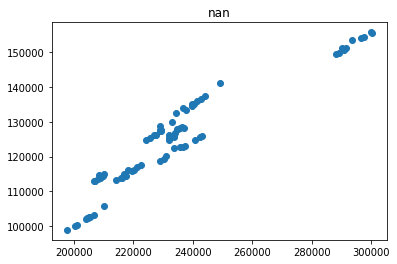

Iteration 154 | Cost: 0.000000 | theta nan nan


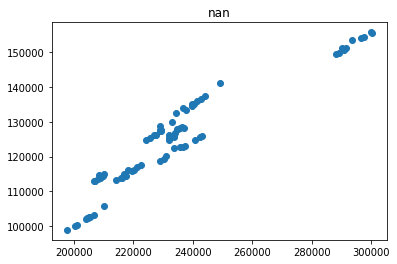

Iteration 155 | Cost: 0.000000 | theta nan nan


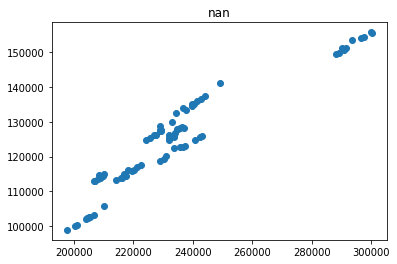

Iteration 156 | Cost: 0.000000 | theta nan nan


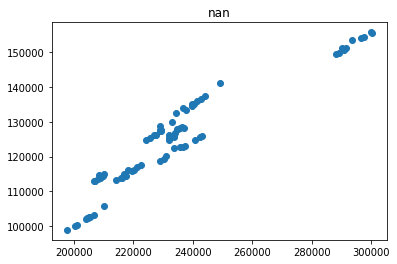

Iteration 157 | Cost: 0.000000 | theta nan nan


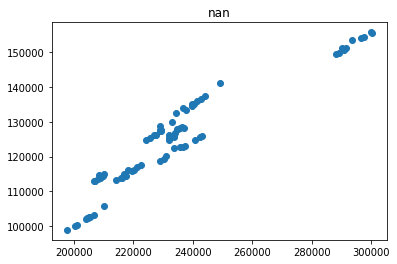

Iteration 158 | Cost: 0.000000 | theta nan nan


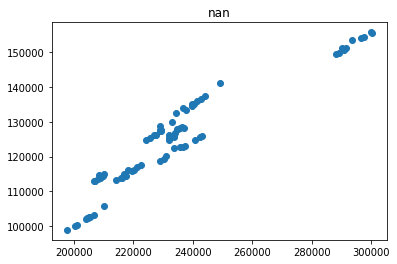

Iteration 159 | Cost: 0.000000 | theta nan nan


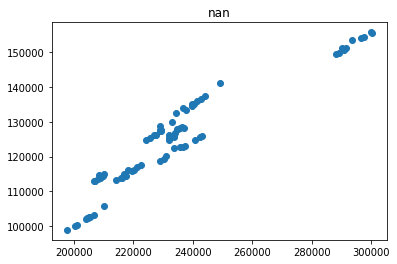

Iteration 160 | Cost: 0.000000 | theta nan nan


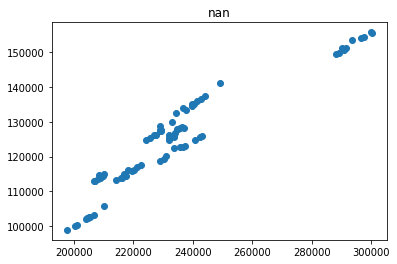

Iteration 161 | Cost: 0.000000 | theta nan nan


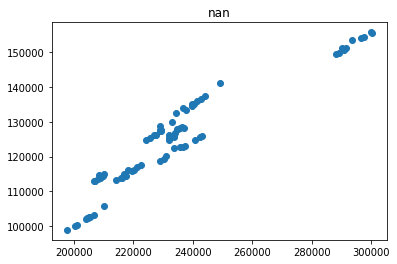

Iteration 162 | Cost: 0.000000 | theta nan nan


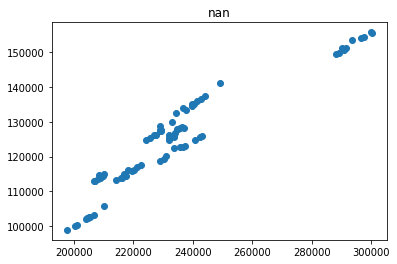

Iteration 163 | Cost: 0.000000 | theta nan nan


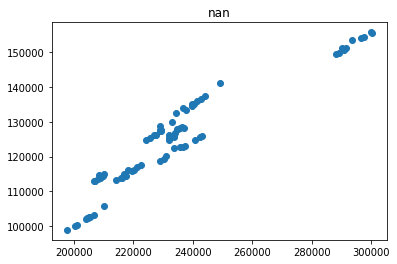

Iteration 164 | Cost: 0.000000 | theta nan nan


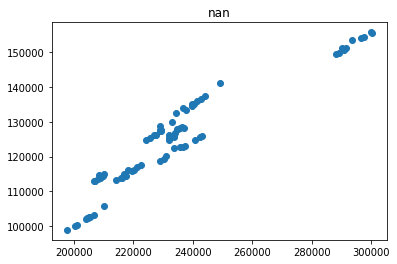

Iteration 165 | Cost: 0.000000 | theta nan nan


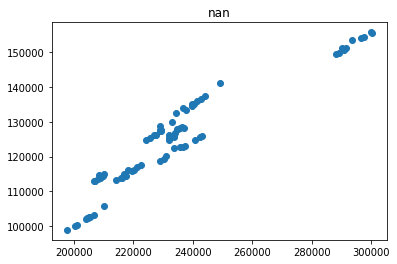

Iteration 166 | Cost: 0.000000 | theta nan nan


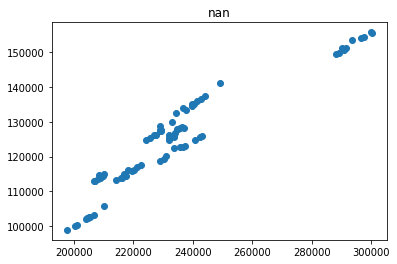

Iteration 167 | Cost: 0.000000 | theta nan nan


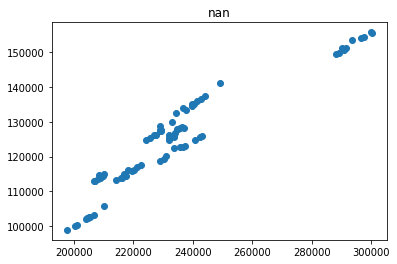

Iteration 168 | Cost: 0.000000 | theta nan nan


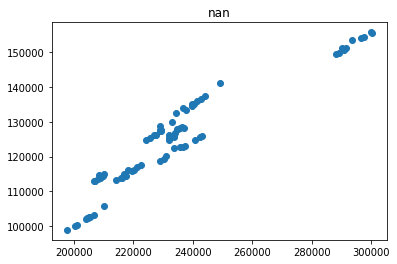

Iteration 169 | Cost: 0.000000 | theta nan nan


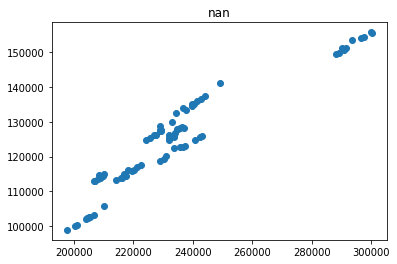

Iteration 170 | Cost: 0.000000 | theta nan nan


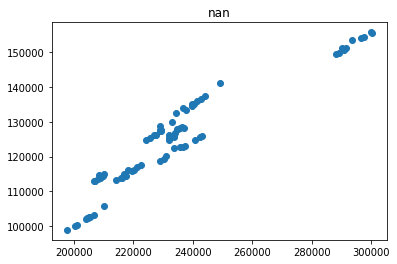

Iteration 171 | Cost: 0.000000 | theta nan nan


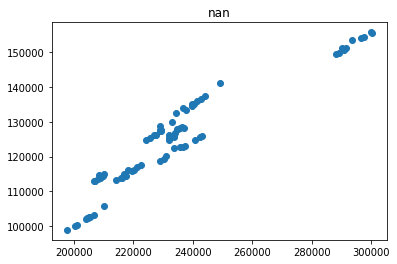

Iteration 172 | Cost: 0.000000 | theta nan nan


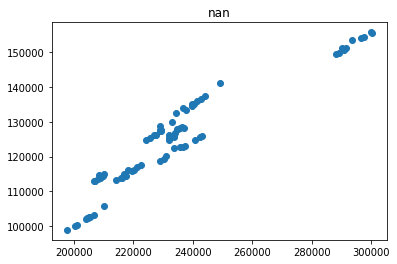

Iteration 173 | Cost: 0.000000 | theta nan nan


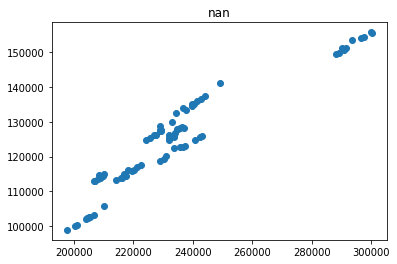

Iteration 174 | Cost: 0.000000 | theta nan nan


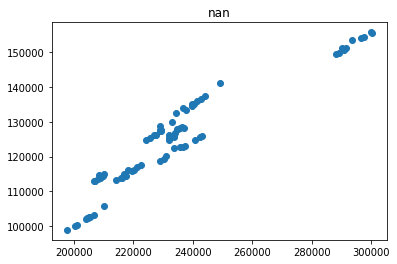

Iteration 175 | Cost: 0.000000 | theta nan nan


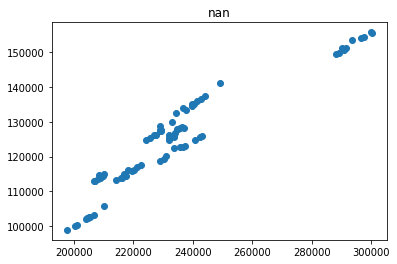

Iteration 176 | Cost: 0.000000 | theta nan nan


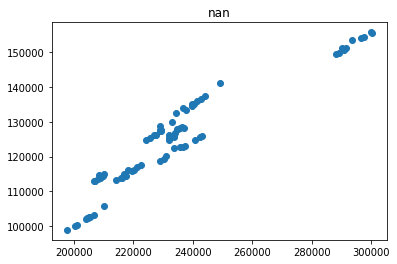

Iteration 177 | Cost: 0.000000 | theta nan nan


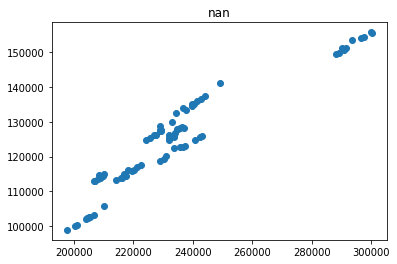

Iteration 178 | Cost: 0.000000 | theta nan nan


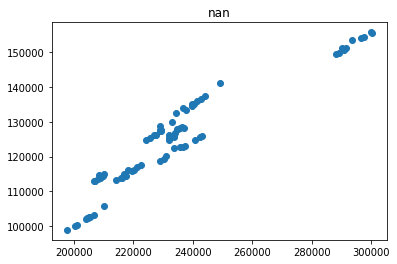

Iteration 179 | Cost: 0.000000 | theta nan nan


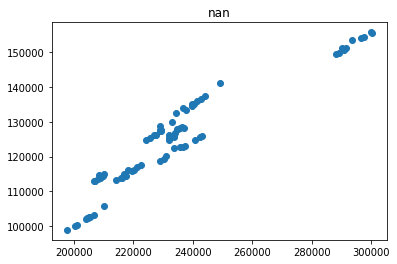

Iteration 180 | Cost: 0.000000 | theta nan nan


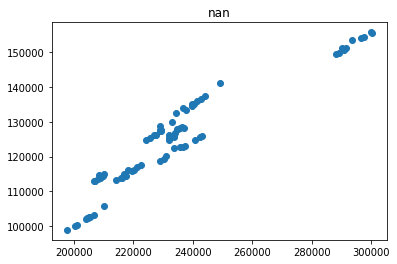

Iteration 181 | Cost: 0.000000 | theta nan nan


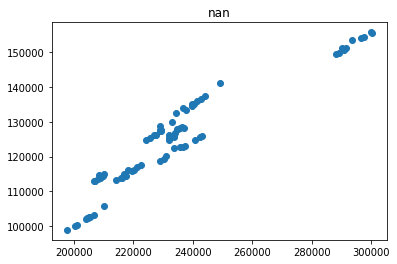

Iteration 182 | Cost: 0.000000 | theta nan nan


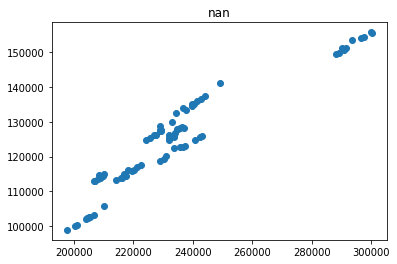

Iteration 183 | Cost: 0.000000 | theta nan nan


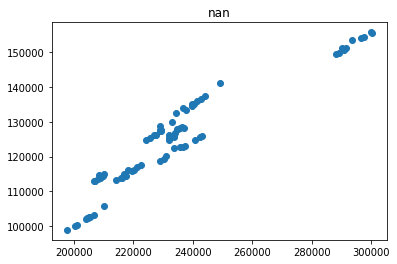

Iteration 184 | Cost: 0.000000 | theta nan nan


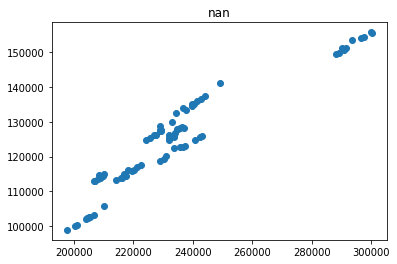

Iteration 185 | Cost: 0.000000 | theta nan nan


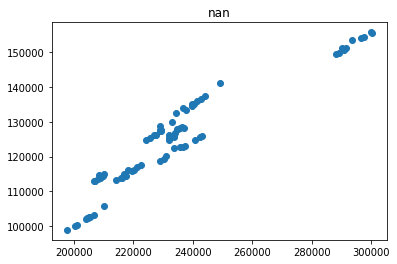

Iteration 186 | Cost: 0.000000 | theta nan nan


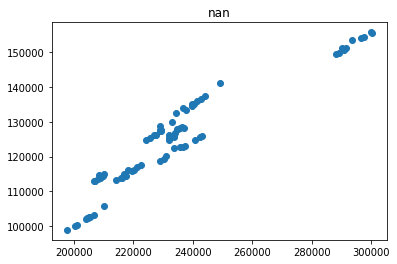

Iteration 187 | Cost: 0.000000 | theta nan nan


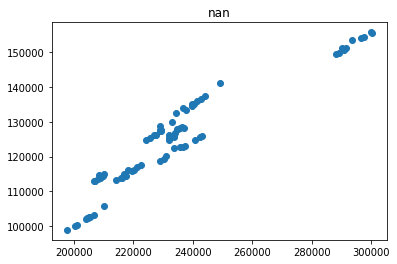

Iteration 188 | Cost: 0.000000 | theta nan nan


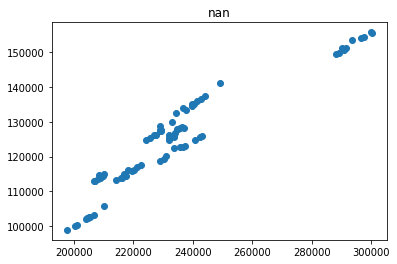

Iteration 189 | Cost: 0.000000 | theta nan nan


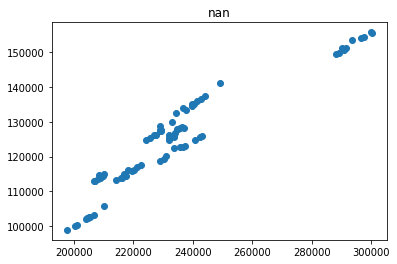

Iteration 190 | Cost: 0.000000 | theta nan nan


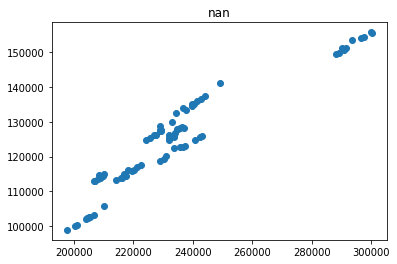

Iteration 191 | Cost: 0.000000 | theta nan nan


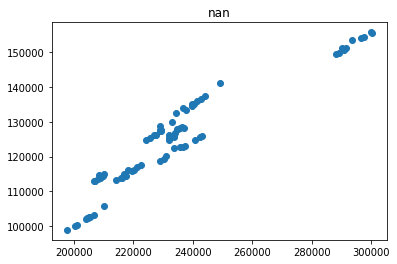

Iteration 192 | Cost: 0.000000 | theta nan nan


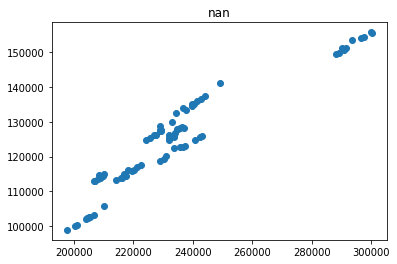

Iteration 193 | Cost: 0.000000 | theta nan nan


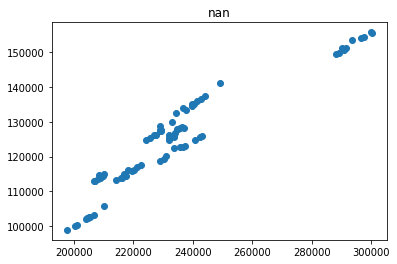

Iteration 194 | Cost: 0.000000 | theta nan nan


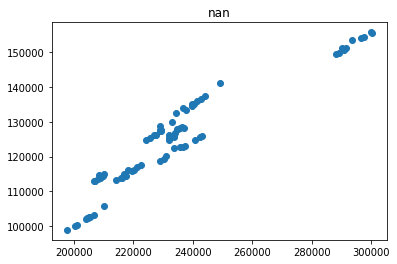

Iteration 195 | Cost: 0.000000 | theta nan nan


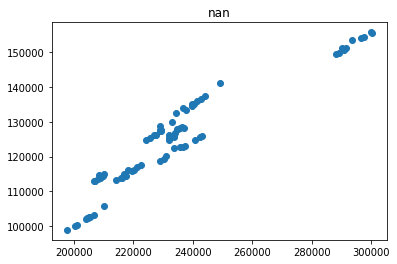

Iteration 196 | Cost: 0.000000 | theta nan nan


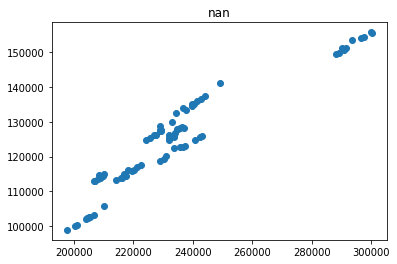

Iteration 197 | Cost: 0.000000 | theta nan nan


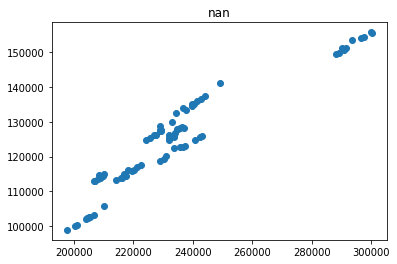

Iteration 198 | Cost: 0.000000 | theta nan nan


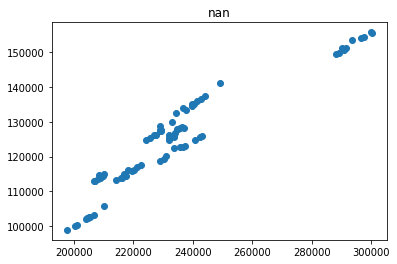

Iteration 199 | Cost: 0.000000 | theta nan nan


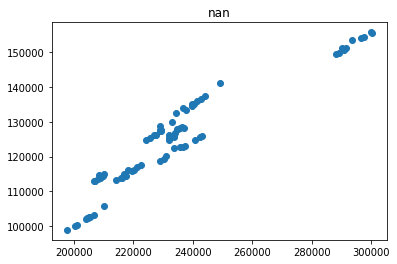

Iteration 200 | Cost: 0.000000 | theta nan nan


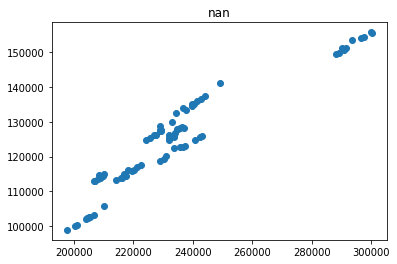

Iteration 201 | Cost: 0.000000 | theta nan nan


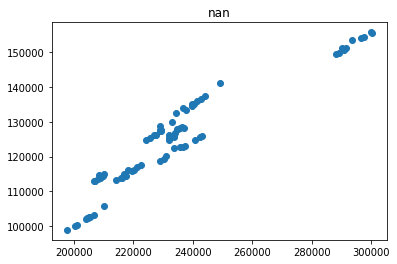

Iteration 202 | Cost: 0.000000 | theta nan nan


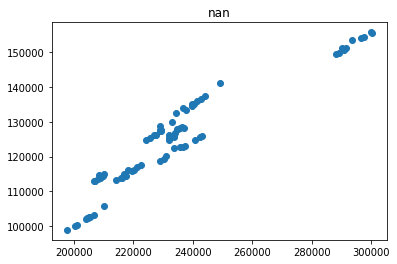

Iteration 203 | Cost: 0.000000 | theta nan nan


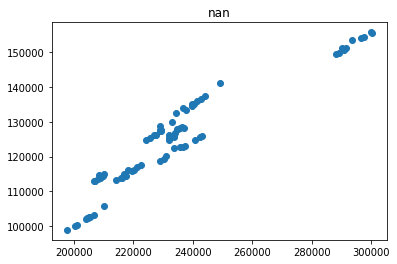

Iteration 204 | Cost: 0.000000 | theta nan nan


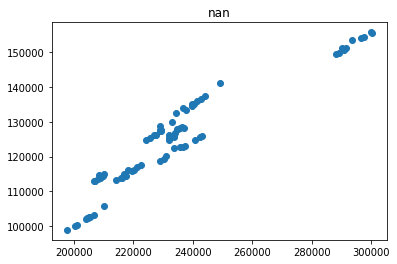

Iteration 205 | Cost: 0.000000 | theta nan nan


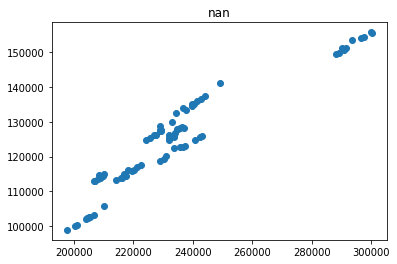

Iteration 206 | Cost: 0.000000 | theta nan nan


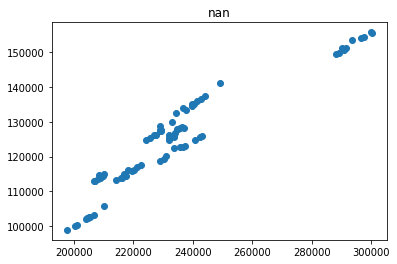

Iteration 207 | Cost: 0.000000 | theta nan nan


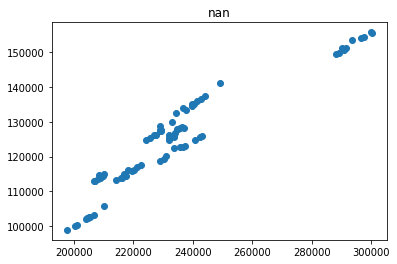

Iteration 208 | Cost: 0.000000 | theta nan nan


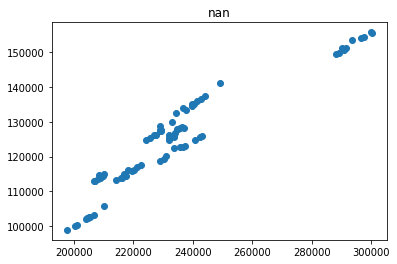

Iteration 209 | Cost: 0.000000 | theta nan nan


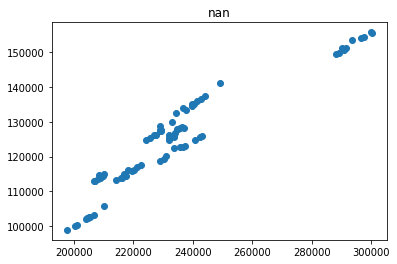

Iteration 210 | Cost: 0.000000 | theta nan nan


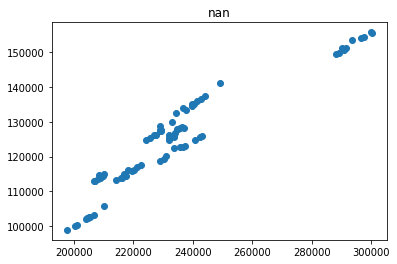

Iteration 211 | Cost: 0.000000 | theta nan nan


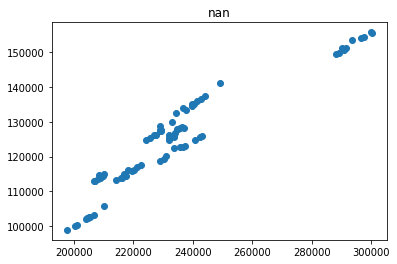

Iteration 212 | Cost: 0.000000 | theta nan nan


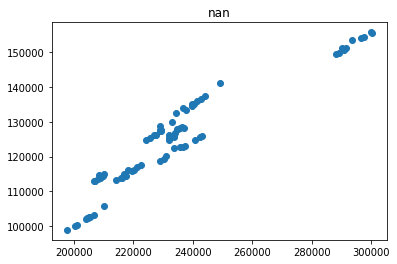

Iteration 213 | Cost: 0.000000 | theta nan nan


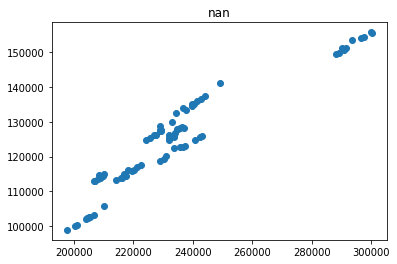

Iteration 214 | Cost: 0.000000 | theta nan nan


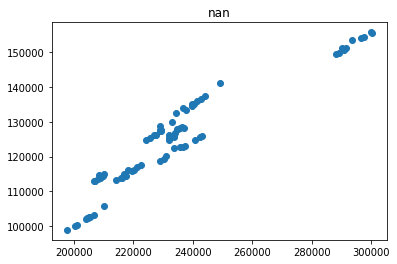

Iteration 215 | Cost: 0.000000 | theta nan nan


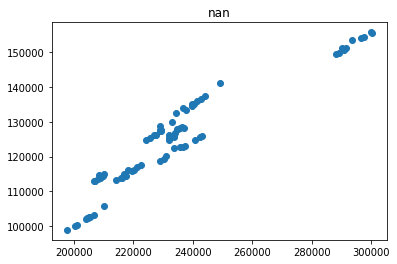

Iteration 216 | Cost: 0.000000 | theta nan nan


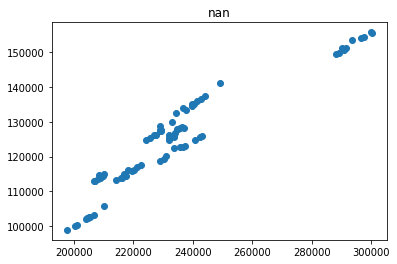

Iteration 217 | Cost: 0.000000 | theta nan nan


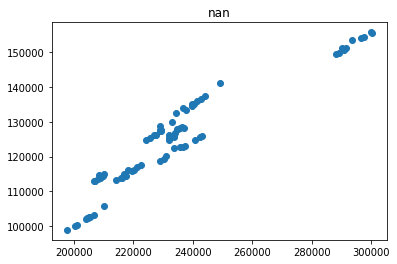

Iteration 218 | Cost: 0.000000 | theta nan nan


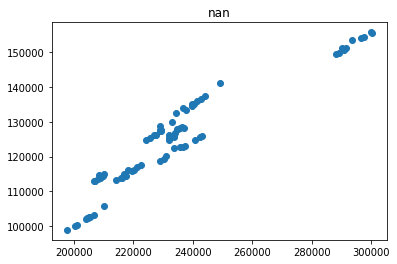

Iteration 219 | Cost: 0.000000 | theta nan nan


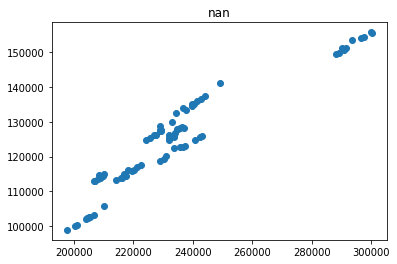

Iteration 220 | Cost: 0.000000 | theta nan nan


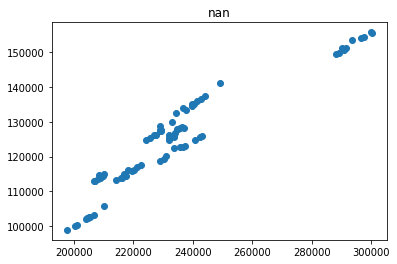

Iteration 221 | Cost: 0.000000 | theta nan nan


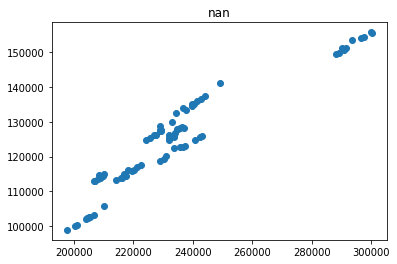

Iteration 222 | Cost: 0.000000 | theta nan nan


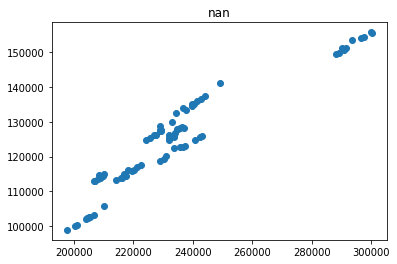

Iteration 223 | Cost: 0.000000 | theta nan nan


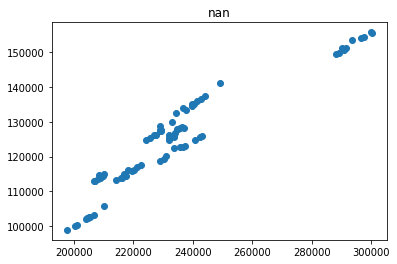

Iteration 224 | Cost: 0.000000 | theta nan nan


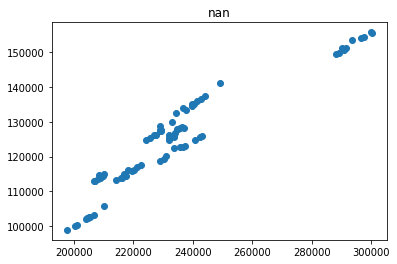

Iteration 225 | Cost: 0.000000 | theta nan nan


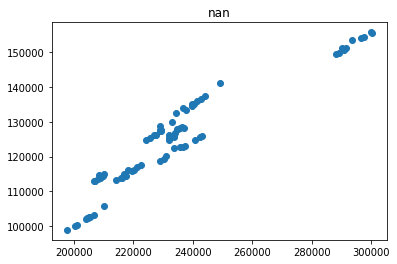

Iteration 226 | Cost: 0.000000 | theta nan nan


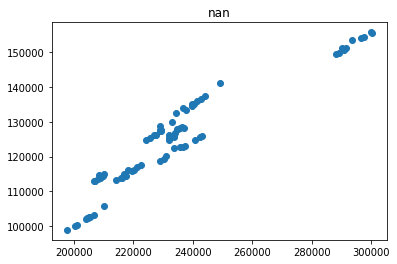

Iteration 227 | Cost: 0.000000 | theta nan nan


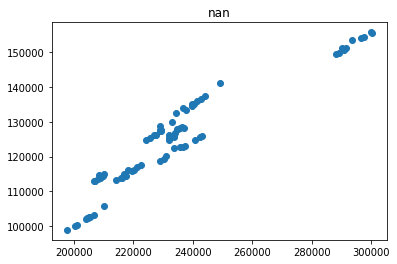

Iteration 228 | Cost: 0.000000 | theta nan nan


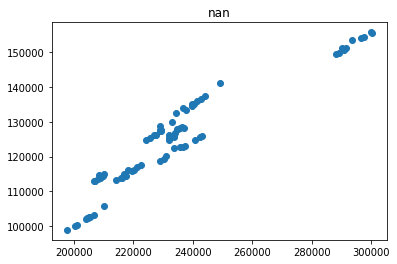

Iteration 229 | Cost: 0.000000 | theta nan nan


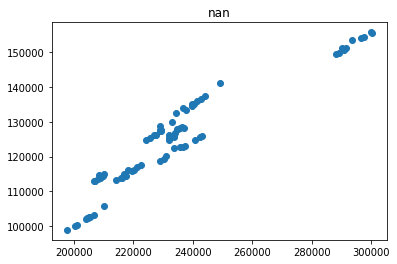

Iteration 230 | Cost: 0.000000 | theta nan nan


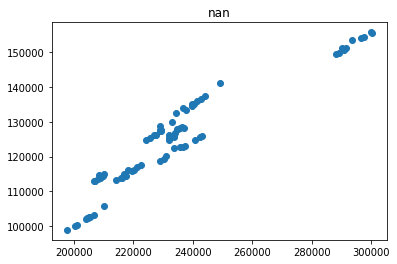

Iteration 231 | Cost: 0.000000 | theta nan nan


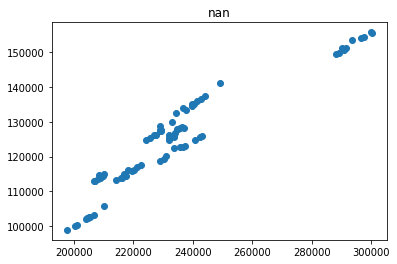

Iteration 232 | Cost: 0.000000 | theta nan nan


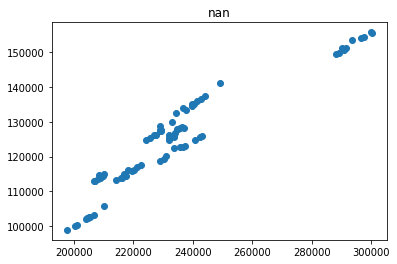

Iteration 233 | Cost: 0.000000 | theta nan nan


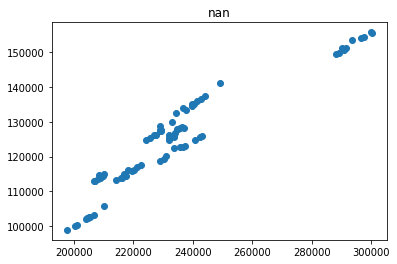

Iteration 234 | Cost: 0.000000 | theta nan nan


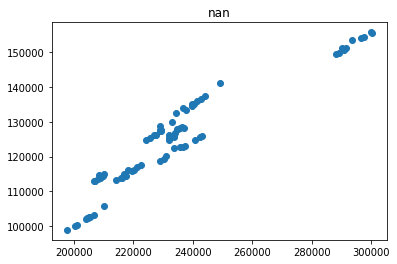

Iteration 235 | Cost: 0.000000 | theta nan nan


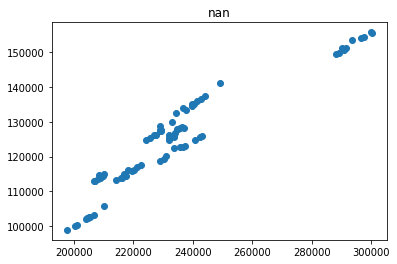

Iteration 236 | Cost: 0.000000 | theta nan nan


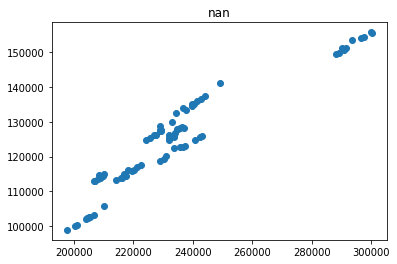

Iteration 237 | Cost: 0.000000 | theta nan nan


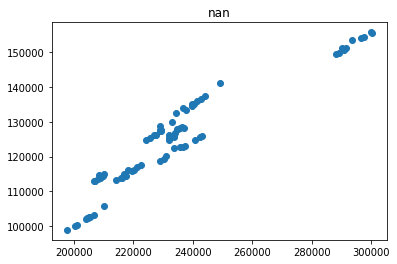

Iteration 238 | Cost: 0.000000 | theta nan nan


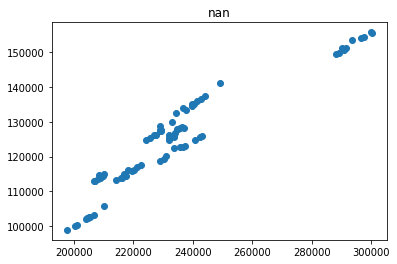

Iteration 239 | Cost: 0.000000 | theta nan nan


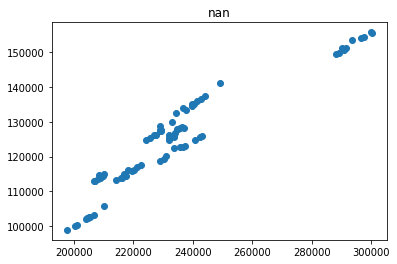

Iteration 240 | Cost: 0.000000 | theta nan nan


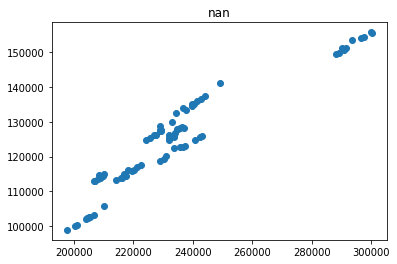

Iteration 241 | Cost: 0.000000 | theta nan nan


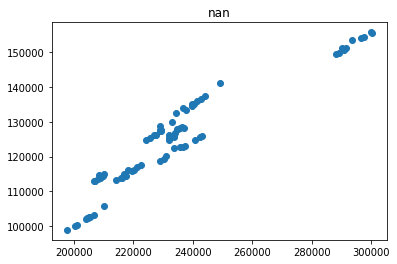

Iteration 242 | Cost: 0.000000 | theta nan nan


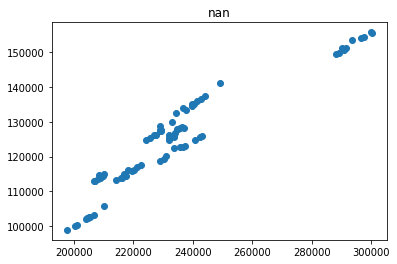

Iteration 243 | Cost: 0.000000 | theta nan nan


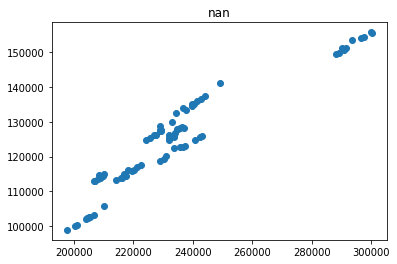

Iteration 244 | Cost: 0.000000 | theta nan nan


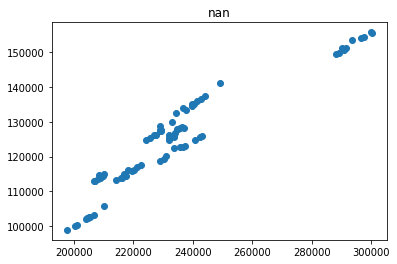

Iteration 245 | Cost: 0.000000 | theta nan nan


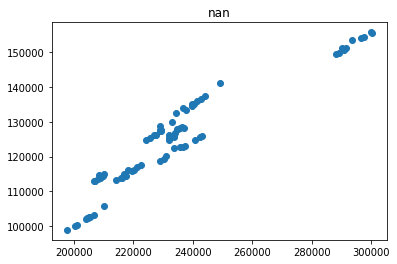

Iteration 246 | Cost: 0.000000 | theta nan nan


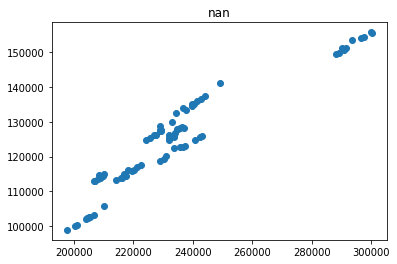

Iteration 247 | Cost: 0.000000 | theta nan nan


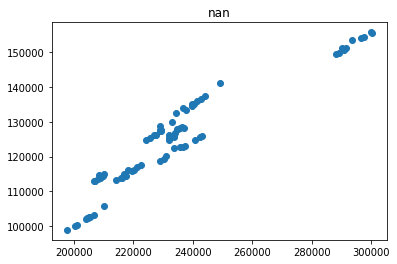

Iteration 248 | Cost: 0.000000 | theta nan nan


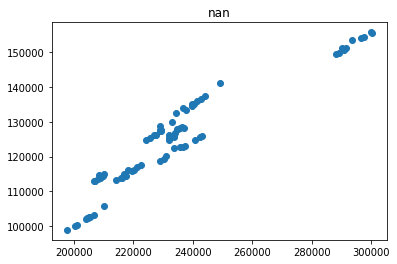

Iteration 249 | Cost: 0.000000 | theta nan nan


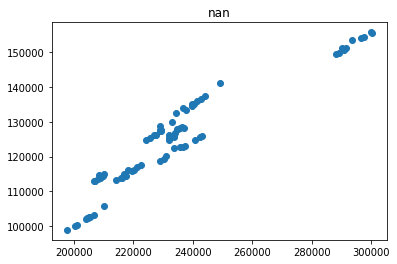

Iteration 250 | Cost: 0.000000 | theta nan nan


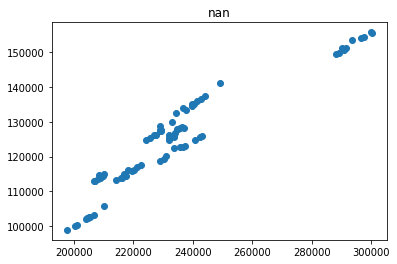

Iteration 251 | Cost: 0.000000 | theta nan nan


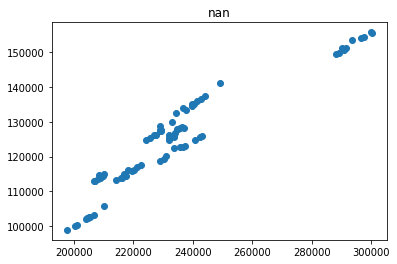

Iteration 252 | Cost: 0.000000 | theta nan nan


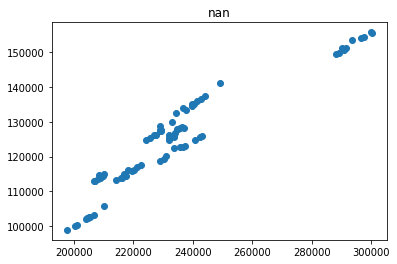

Iteration 253 | Cost: 0.000000 | theta nan nan


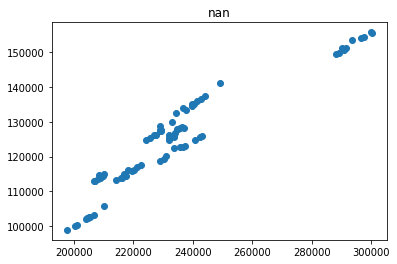

Iteration 254 | Cost: 0.000000 | theta nan nan


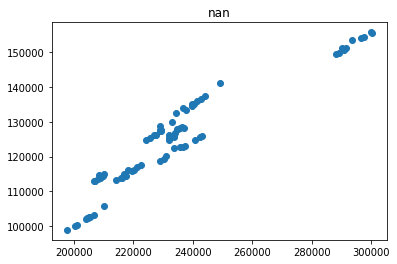

Iteration 255 | Cost: 0.000000 | theta nan nan


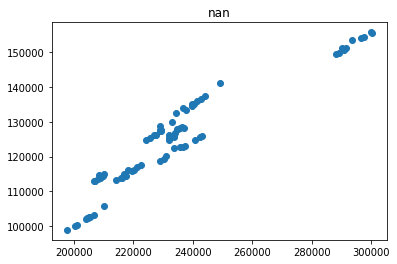

Iteration 256 | Cost: 0.000000 | theta nan nan


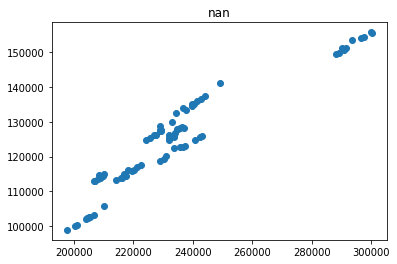

Iteration 257 | Cost: 0.000000 | theta nan nan


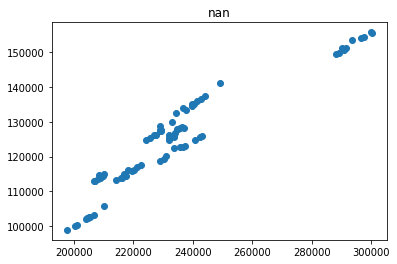

Iteration 258 | Cost: 0.000000 | theta nan nan


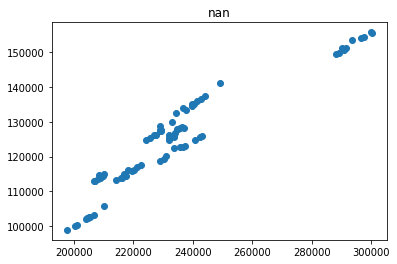

Iteration 259 | Cost: 0.000000 | theta nan nan


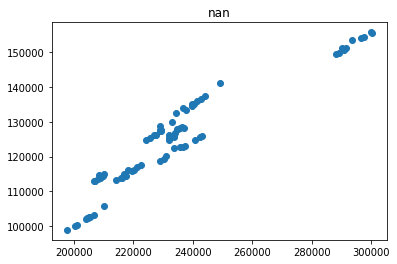

Iteration 260 | Cost: 0.000000 | theta nan nan


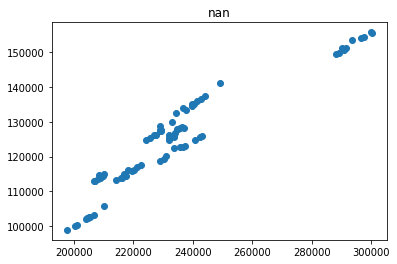

Iteration 261 | Cost: 0.000000 | theta nan nan


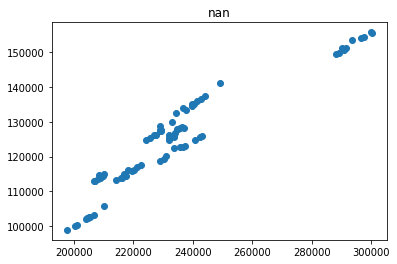

Iteration 262 | Cost: 0.000000 | theta nan nan


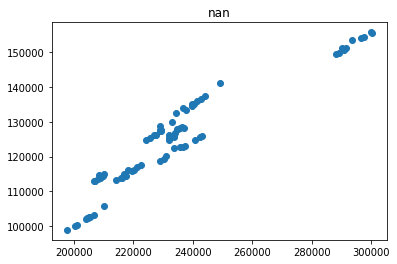

Iteration 263 | Cost: 0.000000 | theta nan nan


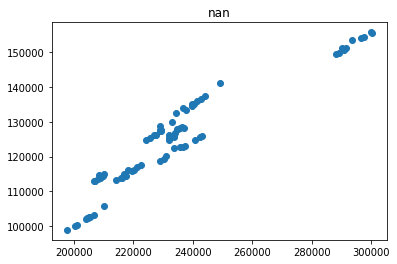

Iteration 264 | Cost: 0.000000 | theta nan nan


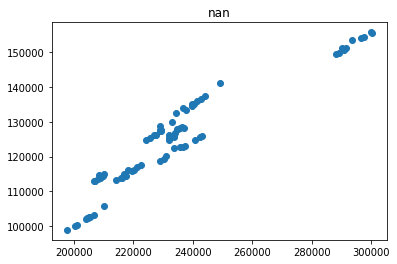

Iteration 265 | Cost: 0.000000 | theta nan nan


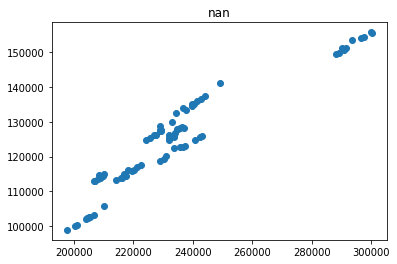

Iteration 266 | Cost: 0.000000 | theta nan nan


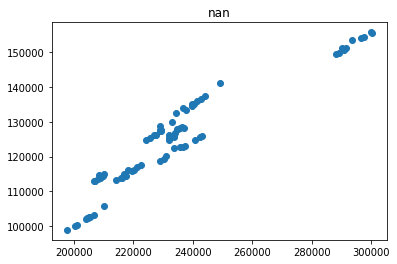

Iteration 267 | Cost: 0.000000 | theta nan nan


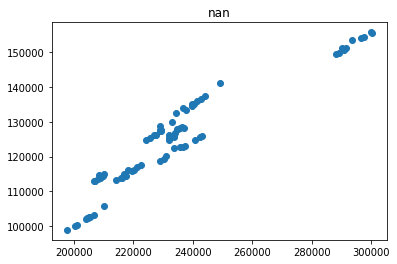

Iteration 268 | Cost: 0.000000 | theta nan nan


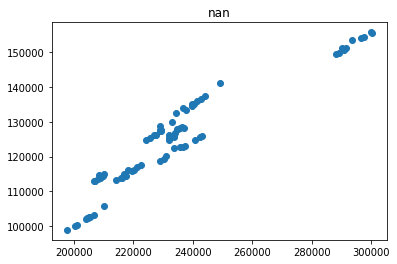

Iteration 269 | Cost: 0.000000 | theta nan nan


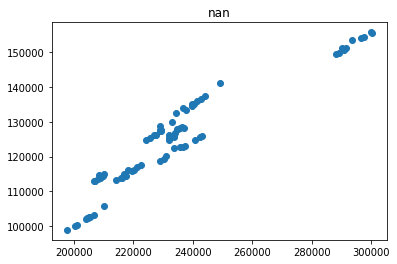

Iteration 270 | Cost: 0.000000 | theta nan nan


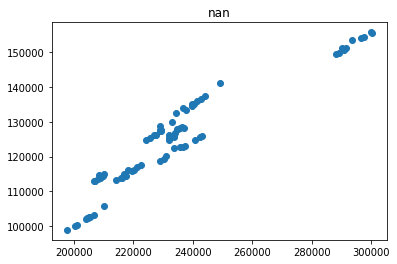

Iteration 271 | Cost: 0.000000 | theta nan nan


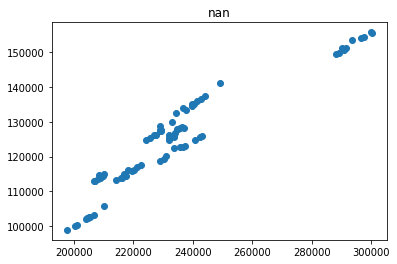

Iteration 272 | Cost: 0.000000 | theta nan nan


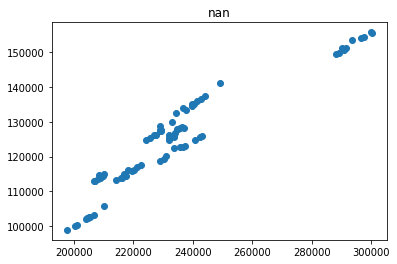

Iteration 273 | Cost: 0.000000 | theta nan nan


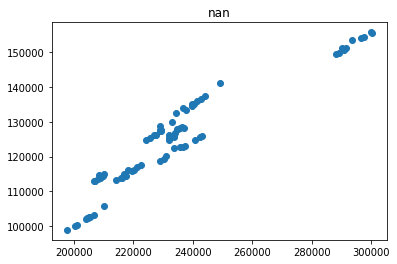

Iteration 274 | Cost: 0.000000 | theta nan nan


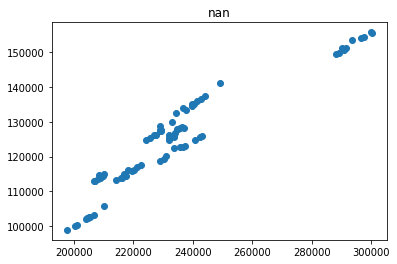

Iteration 275 | Cost: 0.000000 | theta nan nan


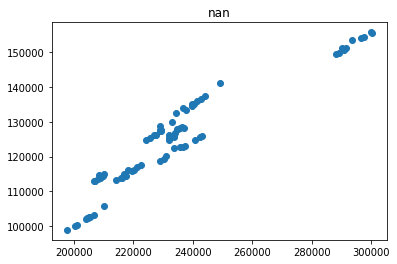

Iteration 276 | Cost: 0.000000 | theta nan nan


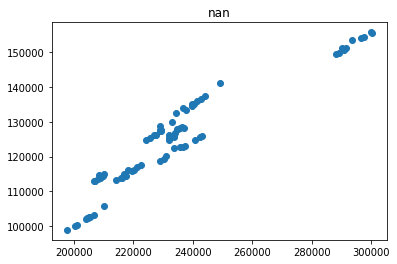

Iteration 277 | Cost: 0.000000 | theta nan nan


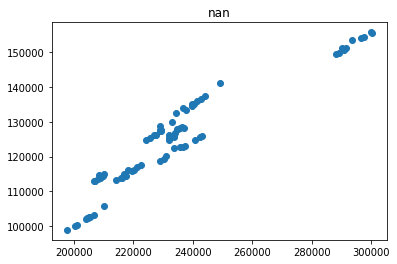

Iteration 278 | Cost: 0.000000 | theta nan nan


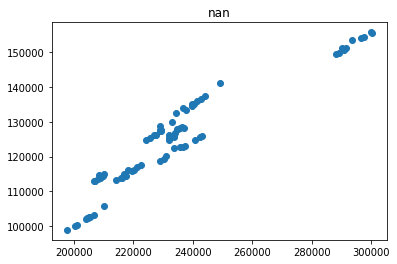

Iteration 279 | Cost: 0.000000 | theta nan nan


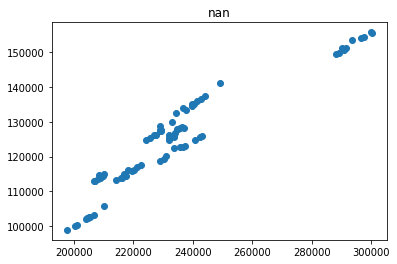

Iteration 280 | Cost: 0.000000 | theta nan nan


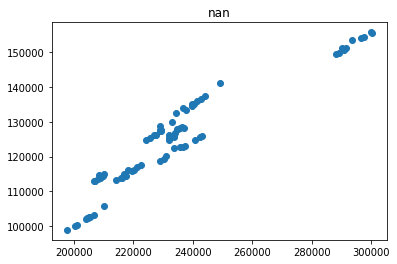

Iteration 281 | Cost: 0.000000 | theta nan nan


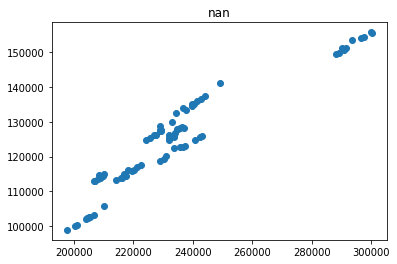

Iteration 282 | Cost: 0.000000 | theta nan nan


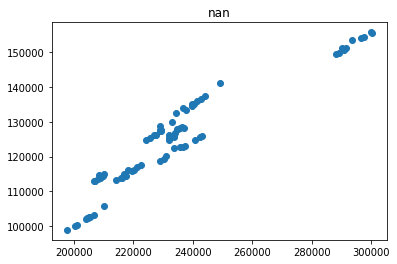

Iteration 283 | Cost: 0.000000 | theta nan nan


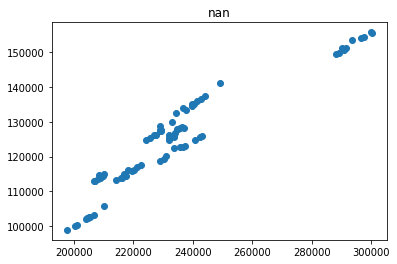

Iteration 284 | Cost: 0.000000 | theta nan nan


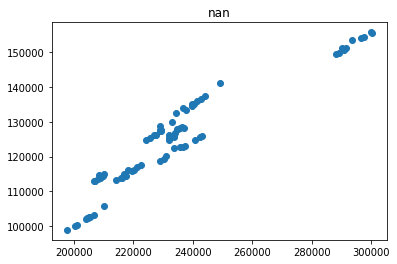

Iteration 285 | Cost: 0.000000 | theta nan nan


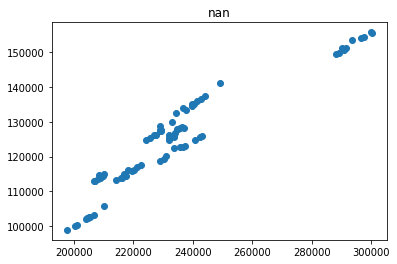

Iteration 286 | Cost: 0.000000 | theta nan nan


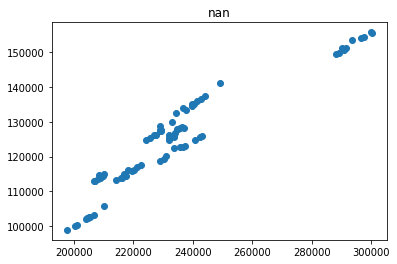

Iteration 287 | Cost: 0.000000 | theta nan nan


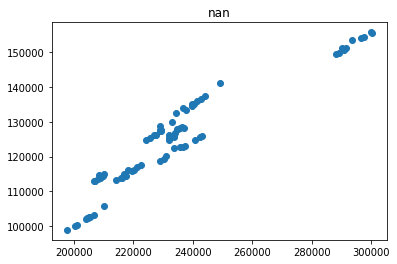

Iteration 288 | Cost: 0.000000 | theta nan nan


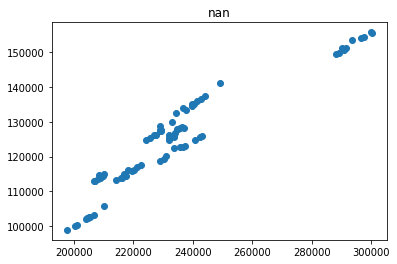

Iteration 289 | Cost: 0.000000 | theta nan nan


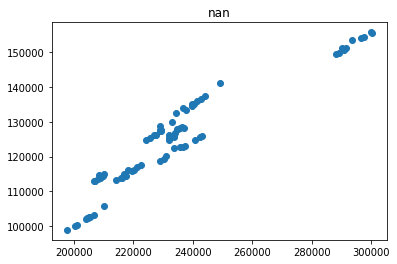

Iteration 290 | Cost: 0.000000 | theta nan nan


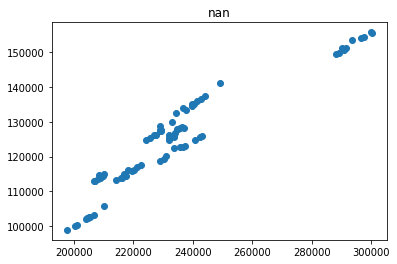

Iteration 291 | Cost: 0.000000 | theta nan nan


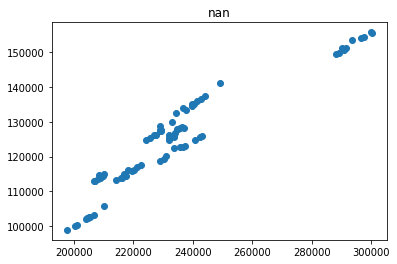

Iteration 292 | Cost: 0.000000 | theta nan nan


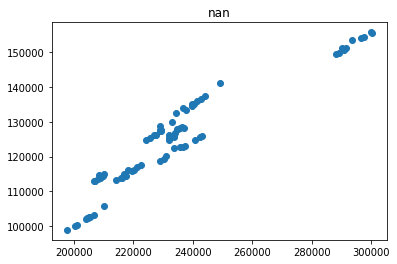

Iteration 293 | Cost: 0.000000 | theta nan nan


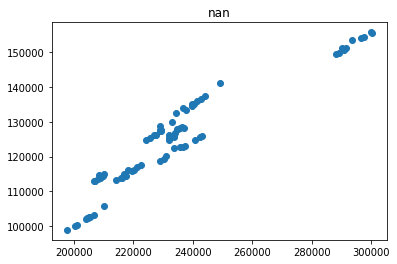

Iteration 294 | Cost: 0.000000 | theta nan nan


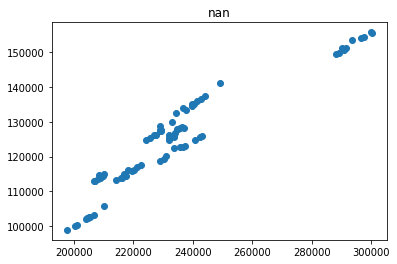

Iteration 295 | Cost: 0.000000 | theta nan nan


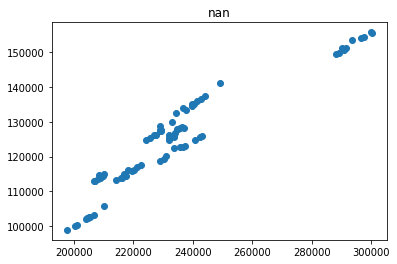

Iteration 296 | Cost: 0.000000 | theta nan nan


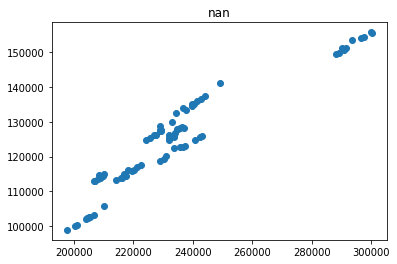

Iteration 297 | Cost: 0.000000 | theta nan nan


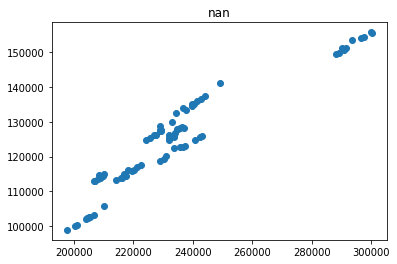

Iteration 298 | Cost: 0.000000 | theta nan nan


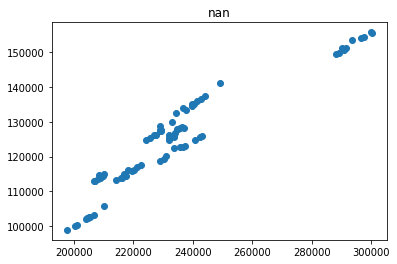

Iteration 299 | Cost: 0.000000 | theta nan nan


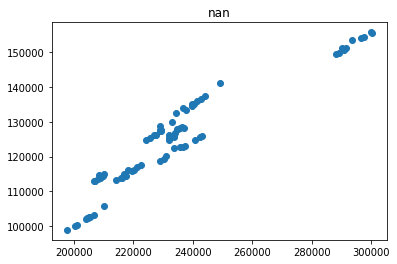

Iteration 300 | Cost: 0.000000 | theta nan nan


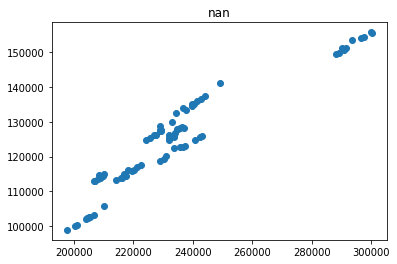

Iteration 301 | Cost: 0.000000 | theta nan nan


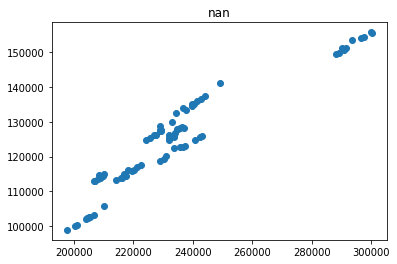

Iteration 302 | Cost: 0.000000 | theta nan nan


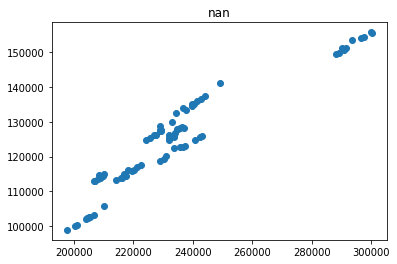

Iteration 303 | Cost: 0.000000 | theta nan nan


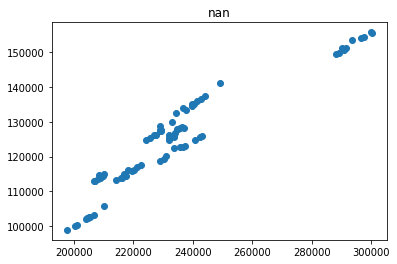

Iteration 304 | Cost: 0.000000 | theta nan nan


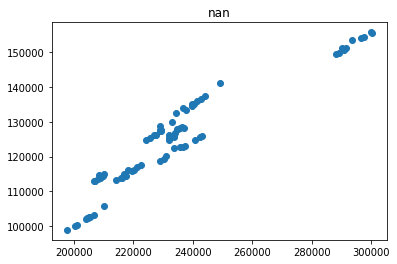

Iteration 305 | Cost: 0.000000 | theta nan nan


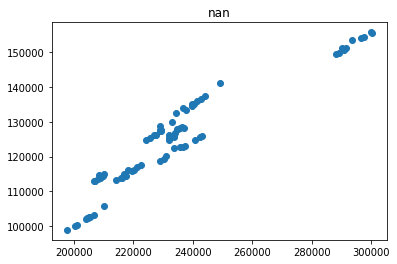

Iteration 306 | Cost: 0.000000 | theta nan nan


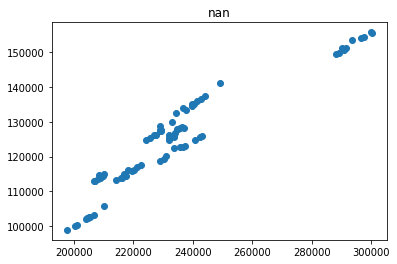

Iteration 307 | Cost: 0.000000 | theta nan nan


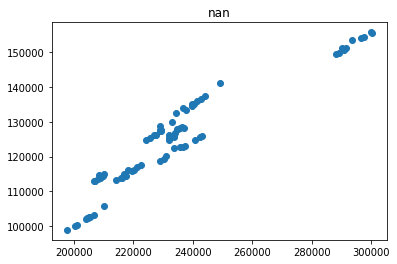

Iteration 308 | Cost: 0.000000 | theta nan nan


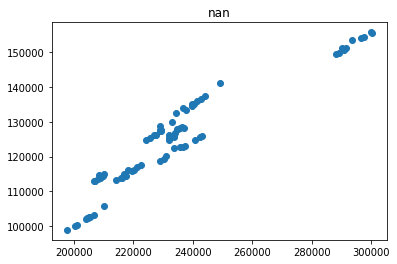

Iteration 309 | Cost: 0.000000 | theta nan nan


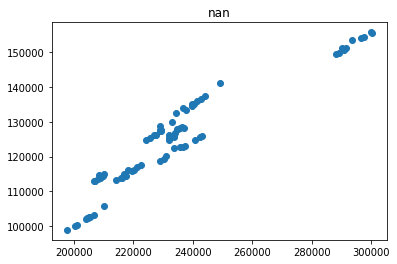

Iteration 310 | Cost: 0.000000 | theta nan nan


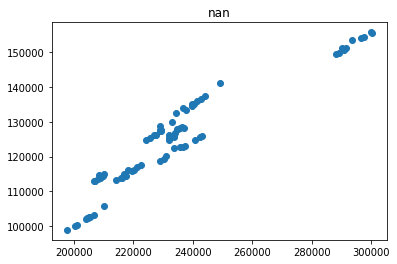

Iteration 311 | Cost: 0.000000 | theta nan nan


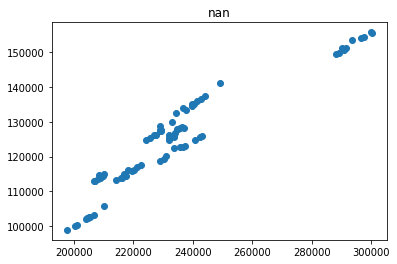

Iteration 312 | Cost: 0.000000 | theta nan nan


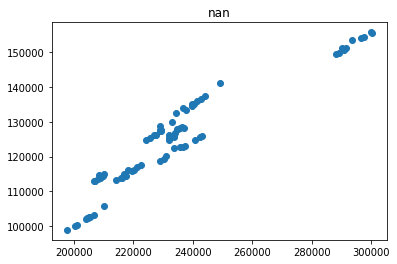

Iteration 313 | Cost: 0.000000 | theta nan nan


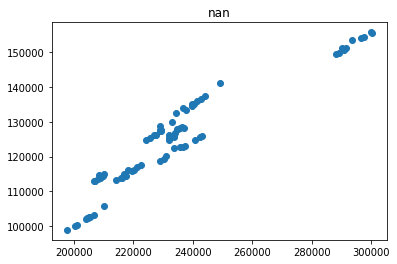

Iteration 314 | Cost: 0.000000 | theta nan nan


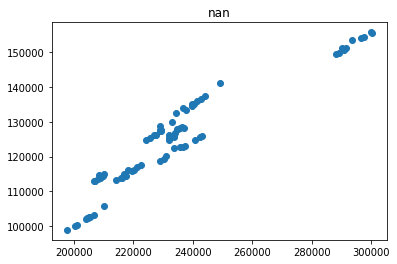

Iteration 315 | Cost: 0.000000 | theta nan nan


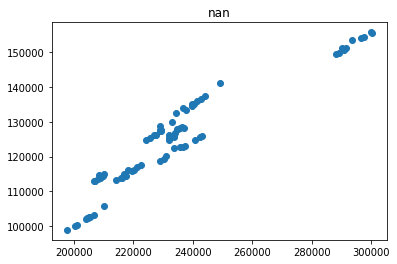

Iteration 316 | Cost: 0.000000 | theta nan nan


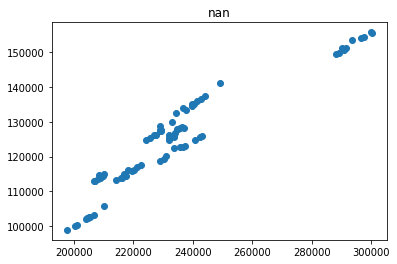

Iteration 317 | Cost: 0.000000 | theta nan nan


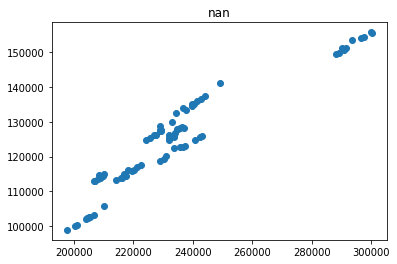

Iteration 318 | Cost: 0.000000 | theta nan nan


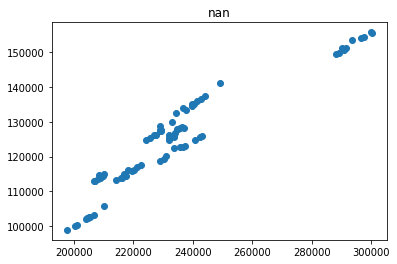

Iteration 319 | Cost: 0.000000 | theta nan nan


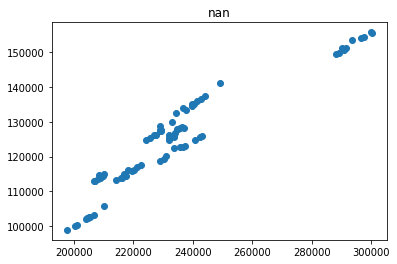

Iteration 320 | Cost: 0.000000 | theta nan nan


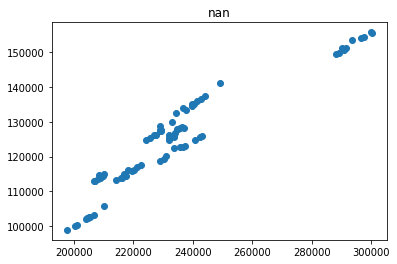

Iteration 321 | Cost: 0.000000 | theta nan nan


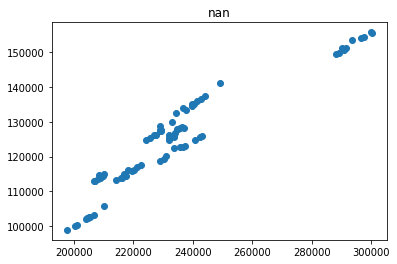

Iteration 322 | Cost: 0.000000 | theta nan nan


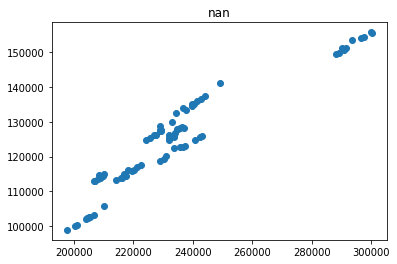

Iteration 323 | Cost: 0.000000 | theta nan nan


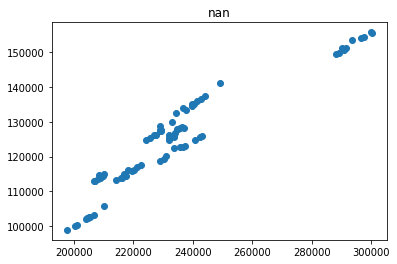

Iteration 324 | Cost: 0.000000 | theta nan nan


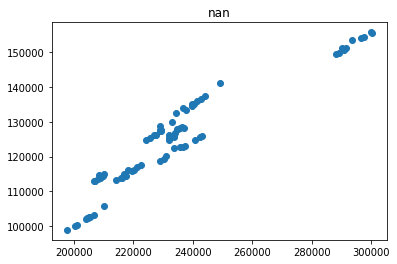

Iteration 325 | Cost: 0.000000 | theta nan nan


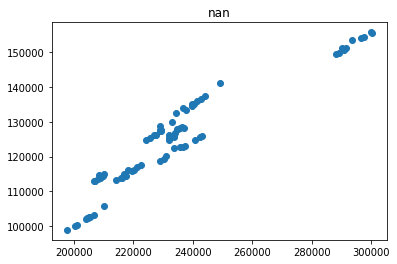

Iteration 326 | Cost: 0.000000 | theta nan nan


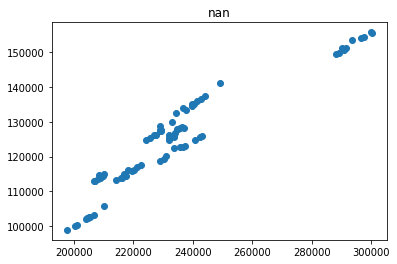

Iteration 327 | Cost: 0.000000 | theta nan nan


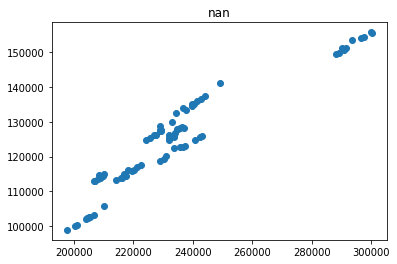

Iteration 328 | Cost: 0.000000 | theta nan nan


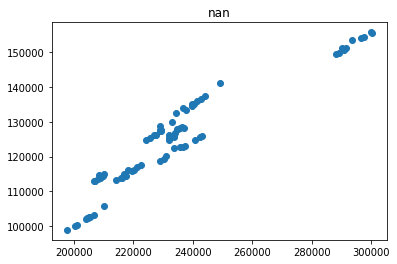

Iteration 329 | Cost: 0.000000 | theta nan nan


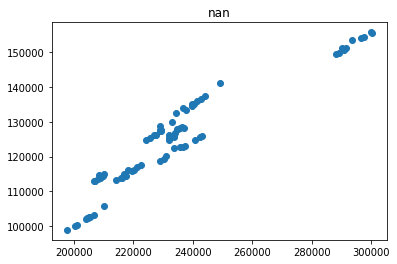

Iteration 330 | Cost: 0.000000 | theta nan nan


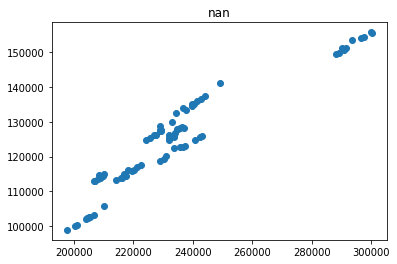

Iteration 331 | Cost: 0.000000 | theta nan nan


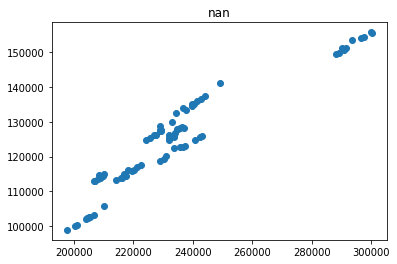

Iteration 332 | Cost: 0.000000 | theta nan nan


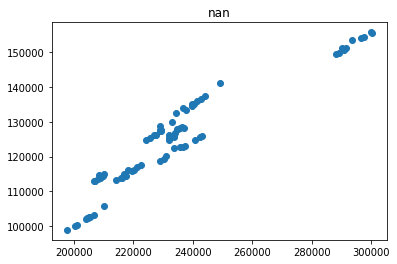

Iteration 333 | Cost: 0.000000 | theta nan nan


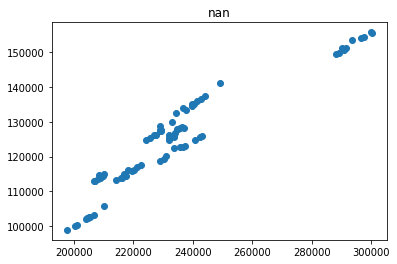

Iteration 334 | Cost: 0.000000 | theta nan nan


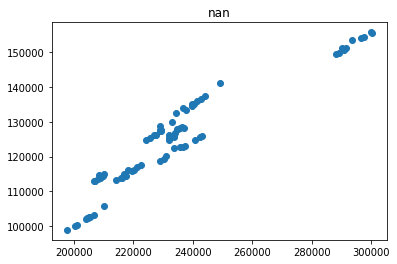

Iteration 335 | Cost: 0.000000 | theta nan nan


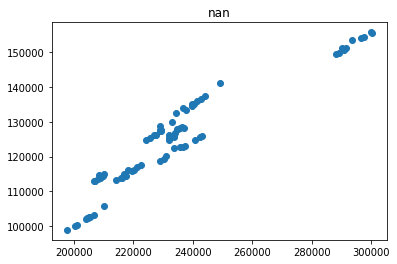

Iteration 336 | Cost: 0.000000 | theta nan nan


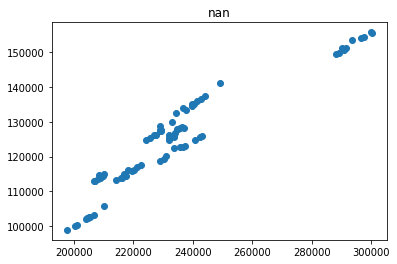

Iteration 337 | Cost: 0.000000 | theta nan nan


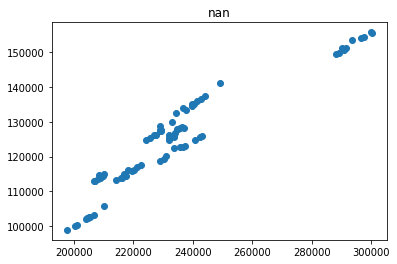

Iteration 338 | Cost: 0.000000 | theta nan nan


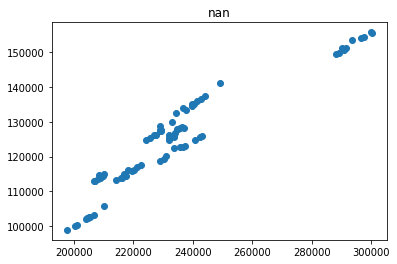

Iteration 339 | Cost: 0.000000 | theta nan nan


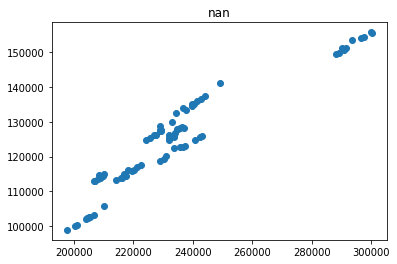

Iteration 340 | Cost: 0.000000 | theta nan nan


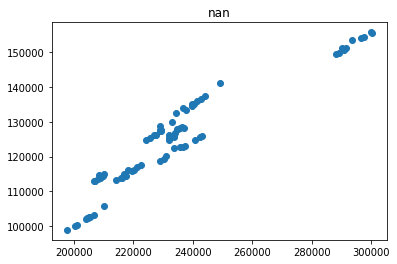

Iteration 341 | Cost: 0.000000 | theta nan nan


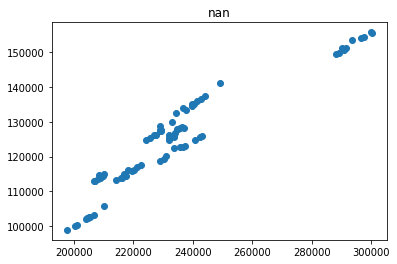

Iteration 342 | Cost: 0.000000 | theta nan nan


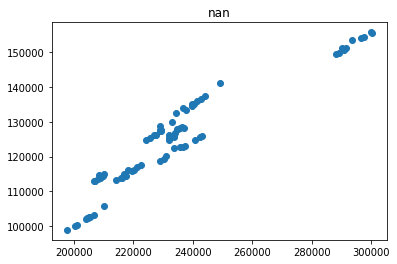

Iteration 343 | Cost: 0.000000 | theta nan nan


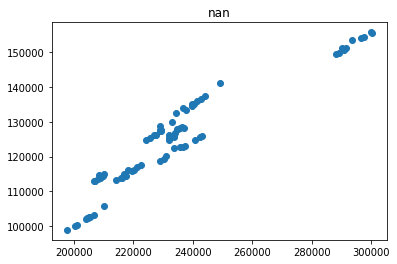

Iteration 344 | Cost: 0.000000 | theta nan nan


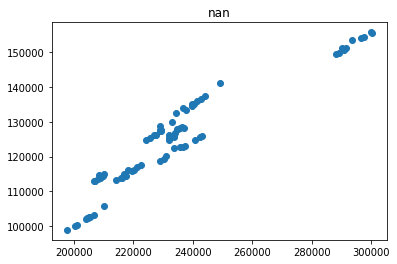

Iteration 345 | Cost: 0.000000 | theta nan nan


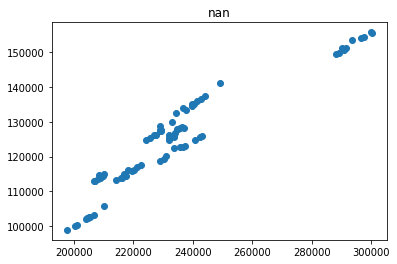

Iteration 346 | Cost: 0.000000 | theta nan nan


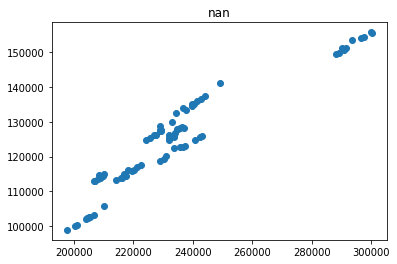

Iteration 347 | Cost: 0.000000 | theta nan nan


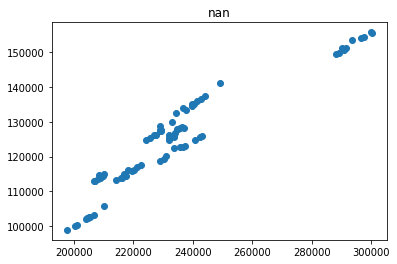

Iteration 348 | Cost: 0.000000 | theta nan nan


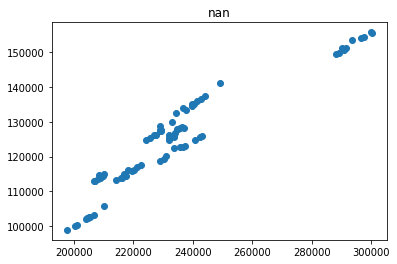

Iteration 349 | Cost: 0.000000 | theta nan nan


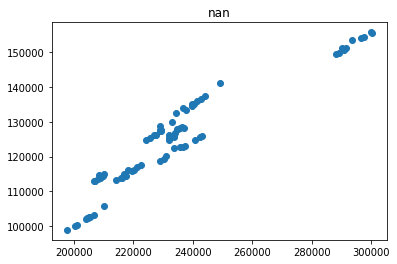

Iteration 350 | Cost: 0.000000 | theta nan nan


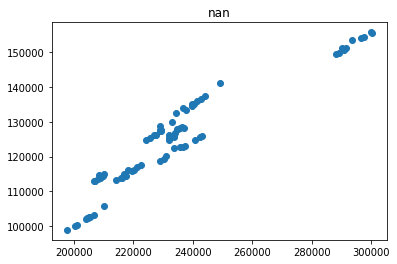

Iteration 351 | Cost: 0.000000 | theta nan nan


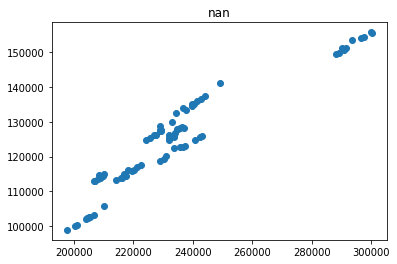

Iteration 352 | Cost: 0.000000 | theta nan nan


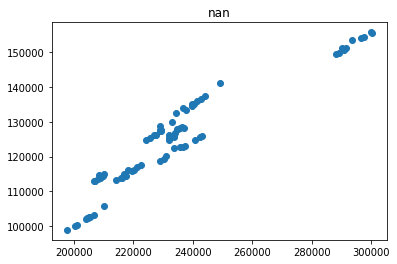

Iteration 353 | Cost: 0.000000 | theta nan nan


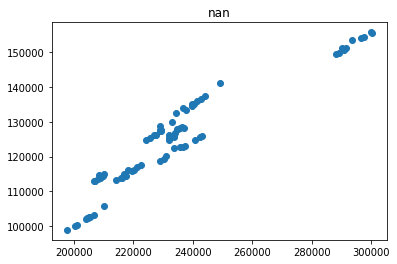

Iteration 354 | Cost: 0.000000 | theta nan nan


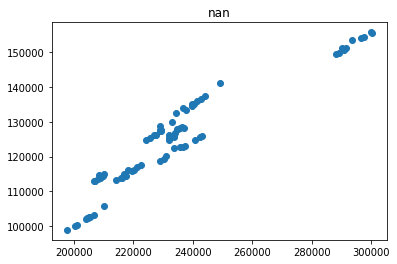

Iteration 355 | Cost: 0.000000 | theta nan nan


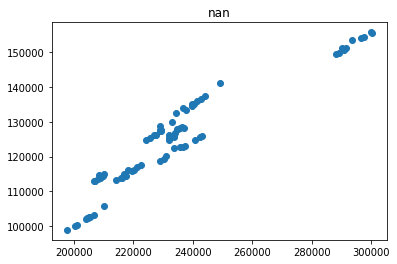

Iteration 356 | Cost: 0.000000 | theta nan nan


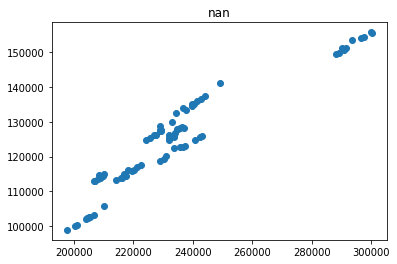

Iteration 357 | Cost: 0.000000 | theta nan nan


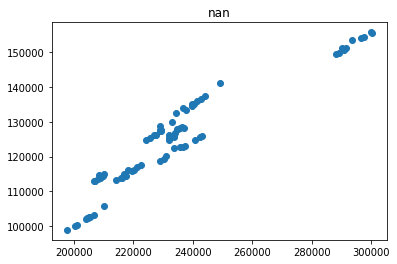

Iteration 358 | Cost: 0.000000 | theta nan nan


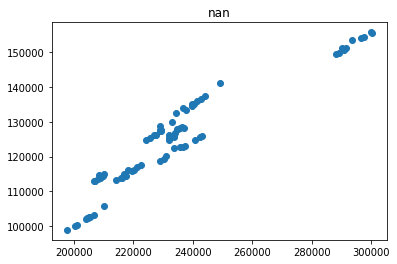

Iteration 359 | Cost: 0.000000 | theta nan nan


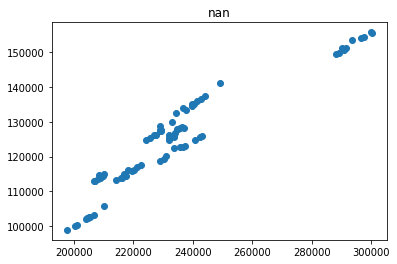

Iteration 360 | Cost: 0.000000 | theta nan nan


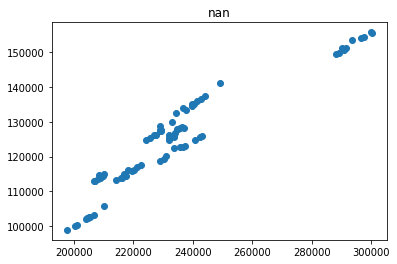

Iteration 361 | Cost: 0.000000 | theta nan nan


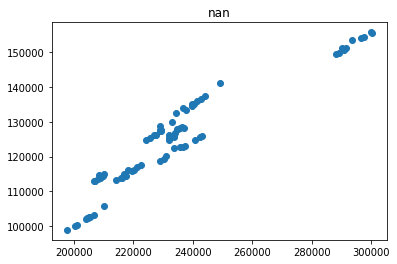

Iteration 362 | Cost: 0.000000 | theta nan nan


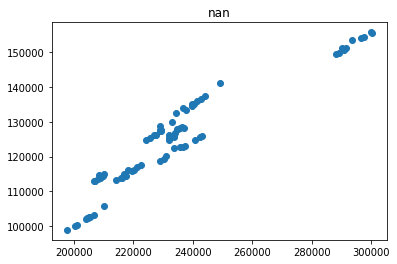

Iteration 363 | Cost: 0.000000 | theta nan nan


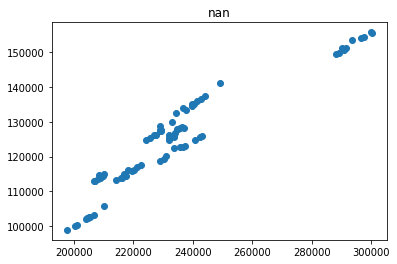

Iteration 364 | Cost: 0.000000 | theta nan nan


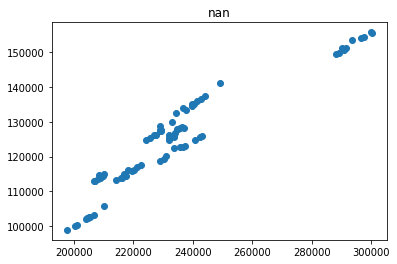

Iteration 365 | Cost: 0.000000 | theta nan nan


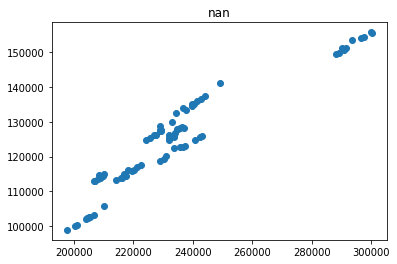

Iteration 366 | Cost: 0.000000 | theta nan nan


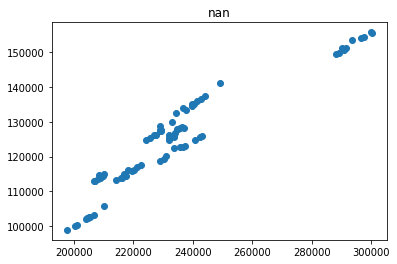

Iteration 367 | Cost: 0.000000 | theta nan nan


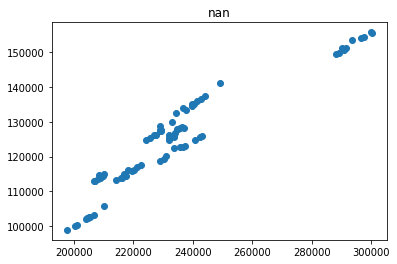

Iteration 368 | Cost: 0.000000 | theta nan nan


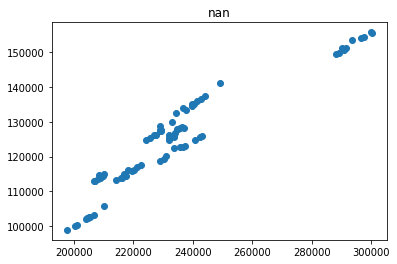

Iteration 369 | Cost: 0.000000 | theta nan nan


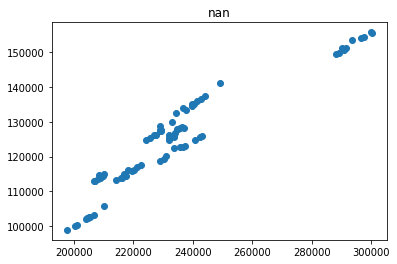

Iteration 370 | Cost: 0.000000 | theta nan nan


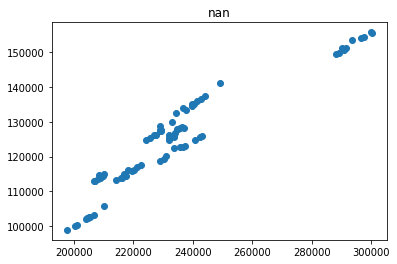

Iteration 371 | Cost: 0.000000 | theta nan nan


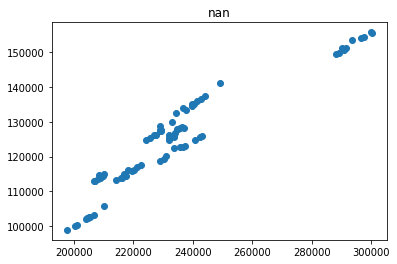

Iteration 372 | Cost: 0.000000 | theta nan nan


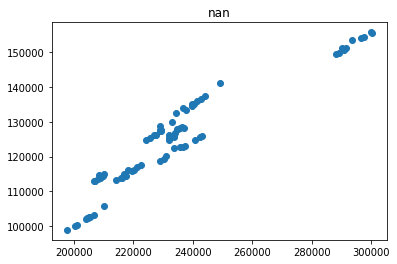

Iteration 373 | Cost: 0.000000 | theta nan nan


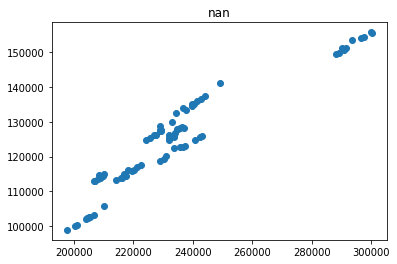

Iteration 374 | Cost: 0.000000 | theta nan nan


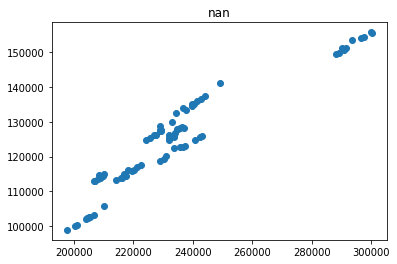

Iteration 375 | Cost: 0.000000 | theta nan nan


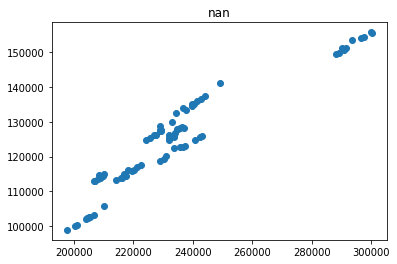

Iteration 376 | Cost: 0.000000 | theta nan nan


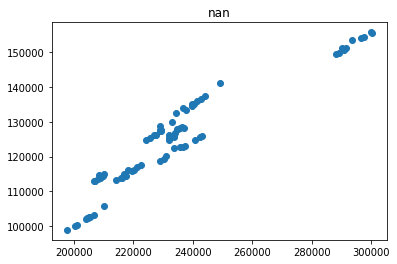

Iteration 377 | Cost: 0.000000 | theta nan nan


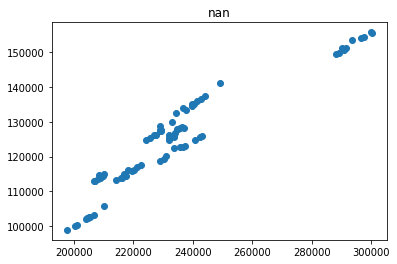

Iteration 378 | Cost: 0.000000 | theta nan nan


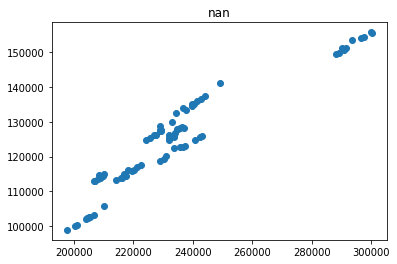

Iteration 379 | Cost: 0.000000 | theta nan nan


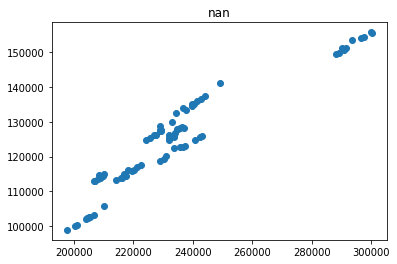

Iteration 380 | Cost: 0.000000 | theta nan nan


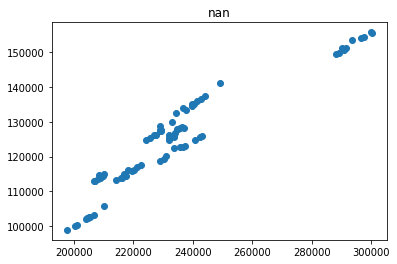

Iteration 381 | Cost: 0.000000 | theta nan nan


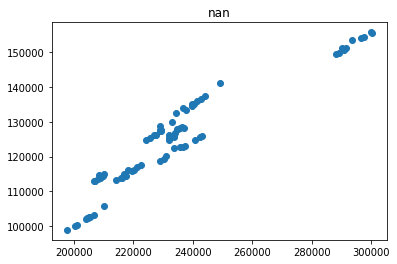

Iteration 382 | Cost: 0.000000 | theta nan nan


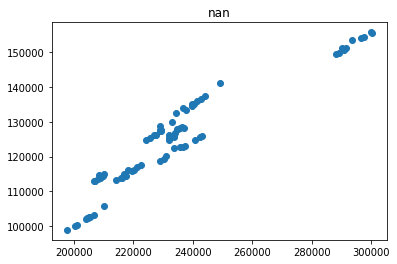

Iteration 383 | Cost: 0.000000 | theta nan nan


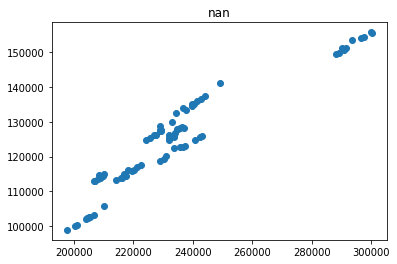

Iteration 384 | Cost: 0.000000 | theta nan nan


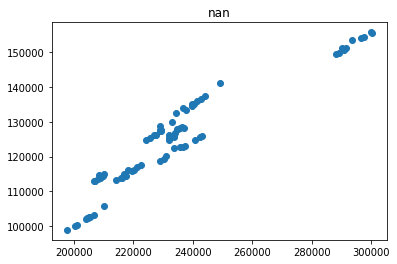

Iteration 385 | Cost: 0.000000 | theta nan nan


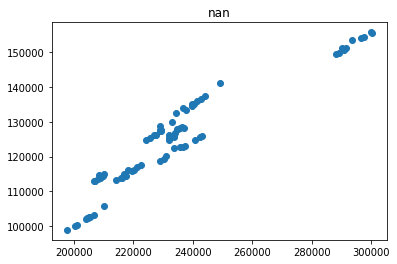

Iteration 386 | Cost: 0.000000 | theta nan nan


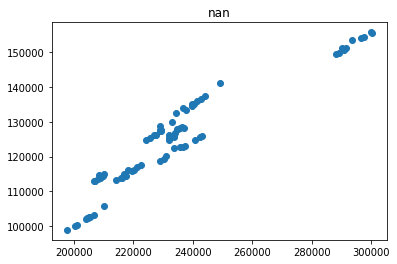

Iteration 387 | Cost: 0.000000 | theta nan nan


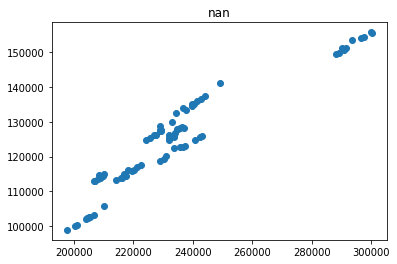

Iteration 388 | Cost: 0.000000 | theta nan nan


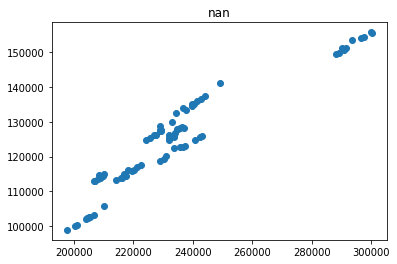

Iteration 389 | Cost: 0.000000 | theta nan nan


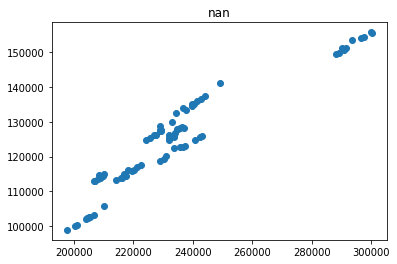

Iteration 390 | Cost: 0.000000 | theta nan nan


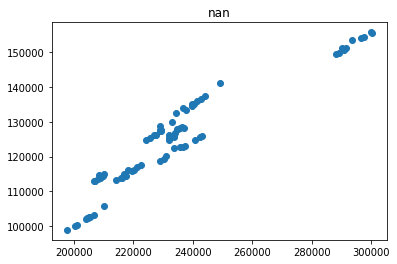

Iteration 391 | Cost: 0.000000 | theta nan nan


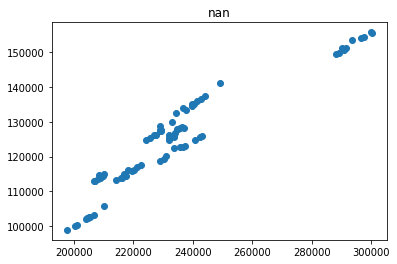

Iteration 392 | Cost: 0.000000 | theta nan nan


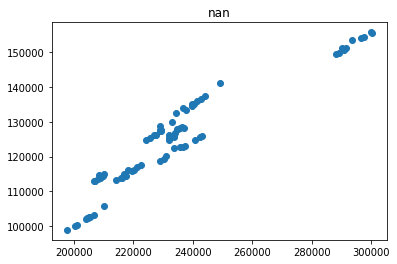

Iteration 393 | Cost: 0.000000 | theta nan nan


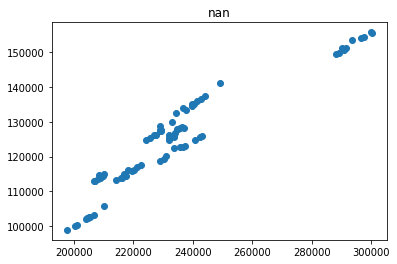

Iteration 394 | Cost: 0.000000 | theta nan nan


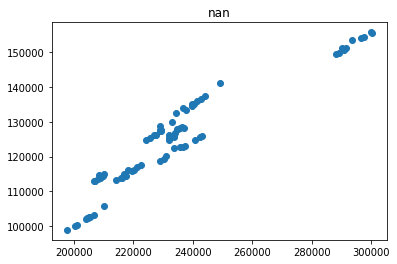

Iteration 395 | Cost: 0.000000 | theta nan nan


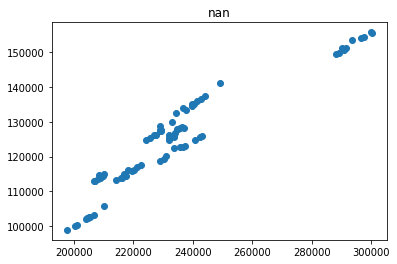

Iteration 396 | Cost: 0.000000 | theta nan nan


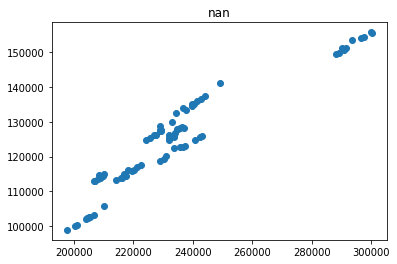

Iteration 397 | Cost: 0.000000 | theta nan nan


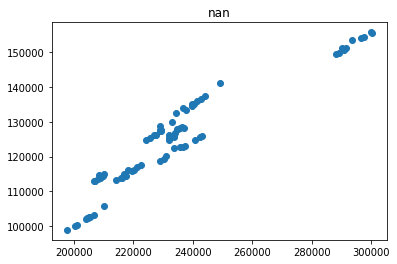

Iteration 398 | Cost: 0.000000 | theta nan nan


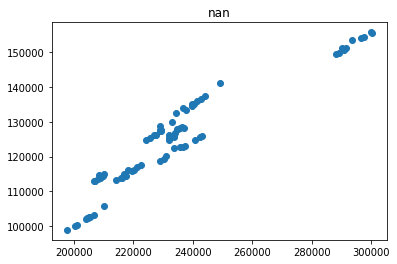

Iteration 399 | Cost: 0.000000 | theta nan nan


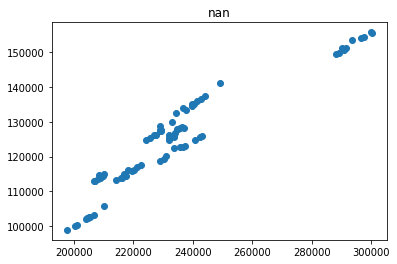

Iteration 400 | Cost: 0.000000 | theta nan nan


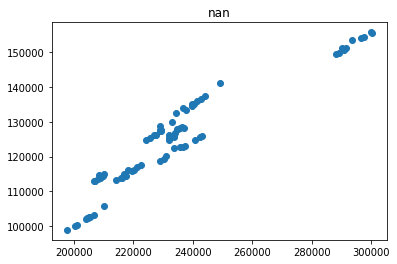

Iteration 401 | Cost: 0.000000 | theta nan nan


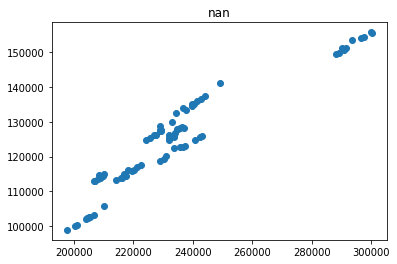

Iteration 402 | Cost: 0.000000 | theta nan nan


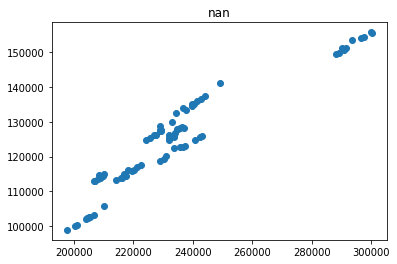

Iteration 403 | Cost: 0.000000 | theta nan nan


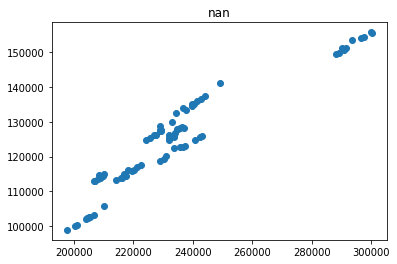

Iteration 404 | Cost: 0.000000 | theta nan nan


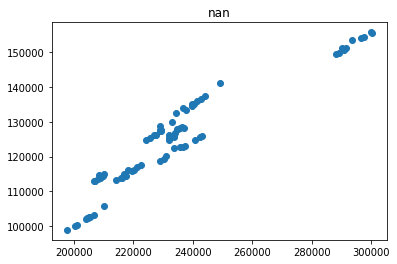

Iteration 405 | Cost: 0.000000 | theta nan nan


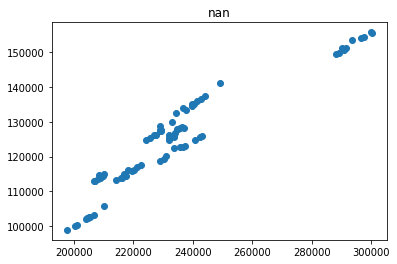

Iteration 406 | Cost: 0.000000 | theta nan nan


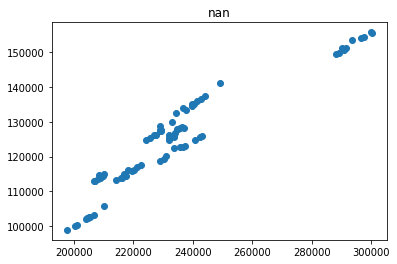

Iteration 407 | Cost: 0.000000 | theta nan nan


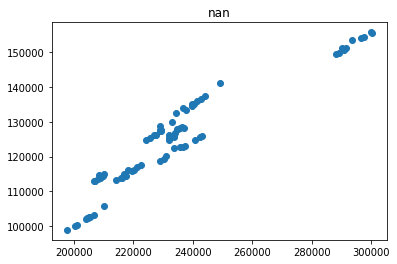

Iteration 408 | Cost: 0.000000 | theta nan nan


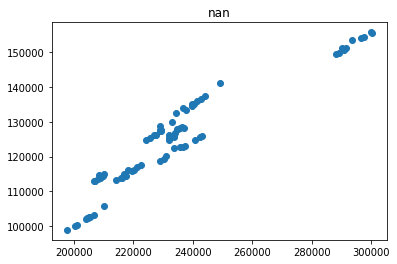

Iteration 409 | Cost: 0.000000 | theta nan nan


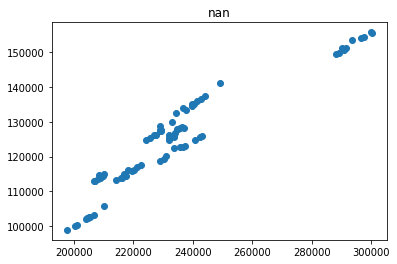

Iteration 410 | Cost: 0.000000 | theta nan nan


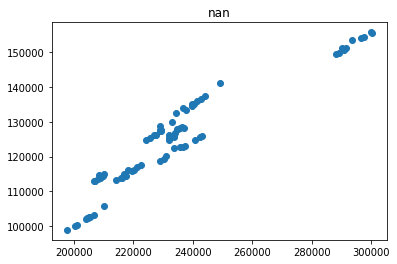

Iteration 411 | Cost: 0.000000 | theta nan nan


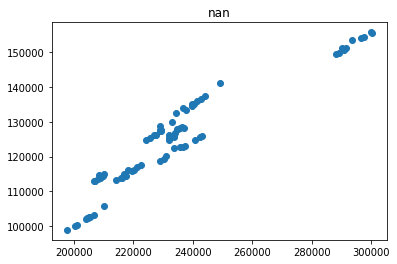

Iteration 412 | Cost: 0.000000 | theta nan nan


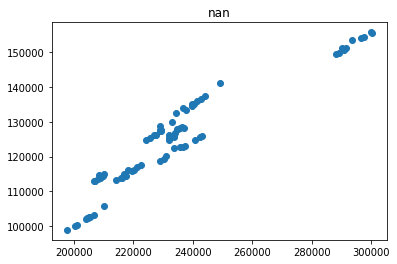

Iteration 413 | Cost: 0.000000 | theta nan nan


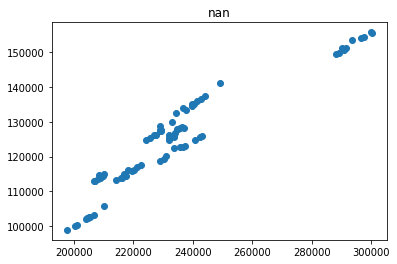

Iteration 414 | Cost: 0.000000 | theta nan nan


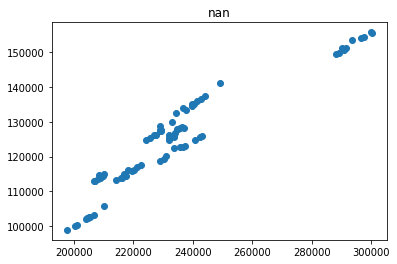

Iteration 415 | Cost: 0.000000 | theta nan nan


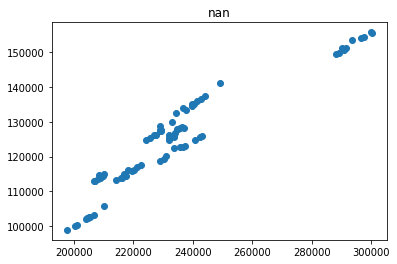

Iteration 416 | Cost: 0.000000 | theta nan nan


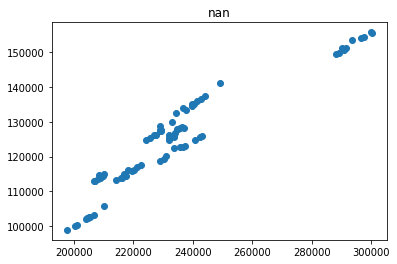

Iteration 417 | Cost: 0.000000 | theta nan nan


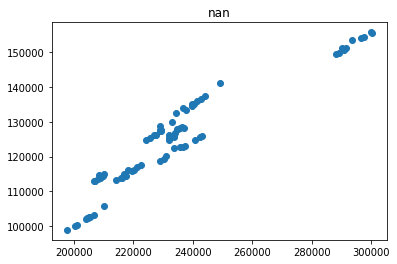

Iteration 418 | Cost: 0.000000 | theta nan nan


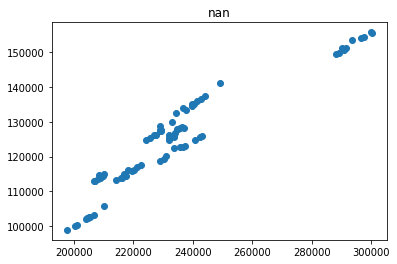

Iteration 419 | Cost: 0.000000 | theta nan nan


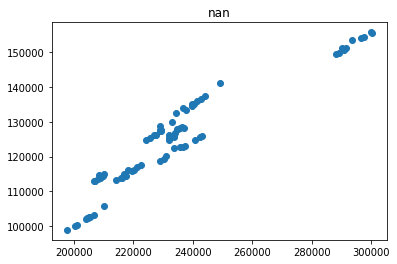

Iteration 420 | Cost: 0.000000 | theta nan nan


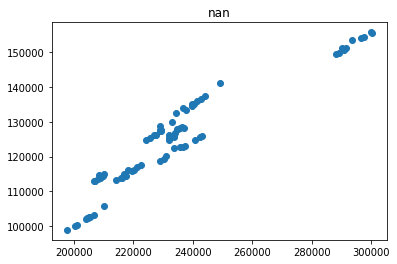

Iteration 421 | Cost: 0.000000 | theta nan nan


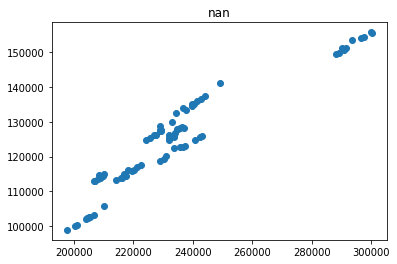

Iteration 422 | Cost: 0.000000 | theta nan nan


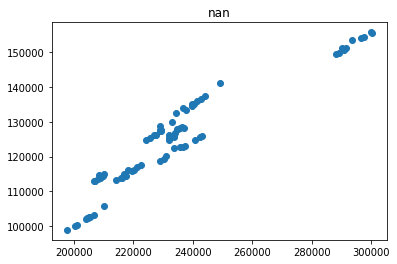

Iteration 423 | Cost: 0.000000 | theta nan nan


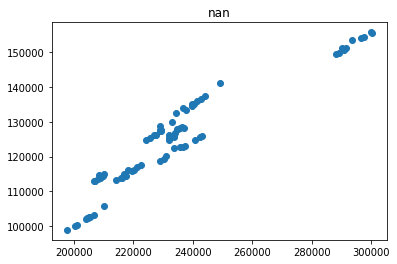

Iteration 424 | Cost: 0.000000 | theta nan nan


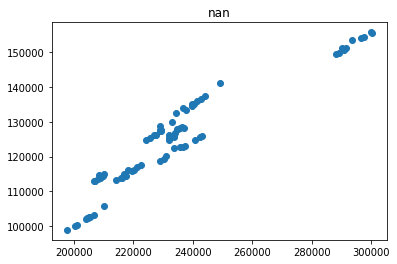

Iteration 425 | Cost: 0.000000 | theta nan nan


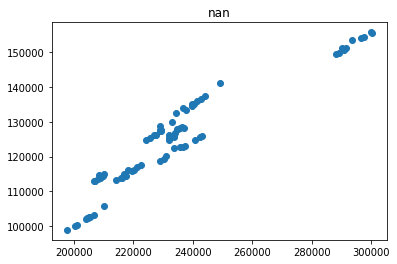

Iteration 426 | Cost: 0.000000 | theta nan nan


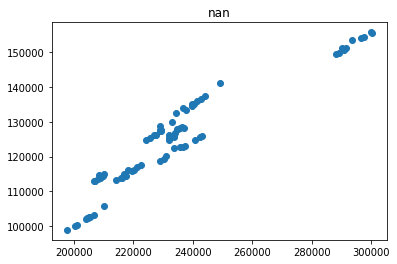

Iteration 427 | Cost: 0.000000 | theta nan nan


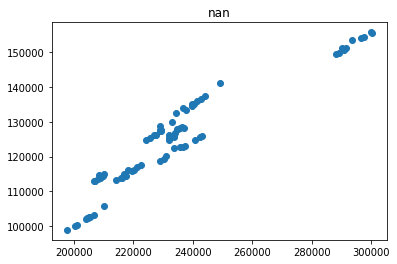

Iteration 428 | Cost: 0.000000 | theta nan nan


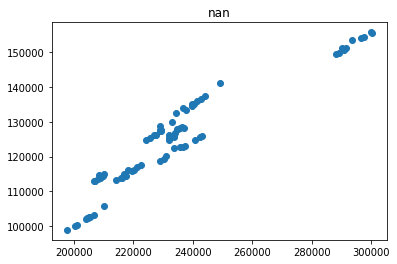

Iteration 429 | Cost: 0.000000 | theta nan nan


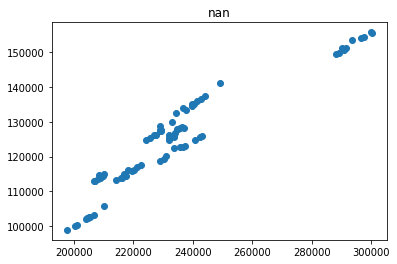

Iteration 430 | Cost: 0.000000 | theta nan nan


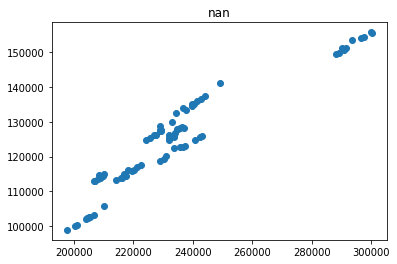

Iteration 431 | Cost: 0.000000 | theta nan nan


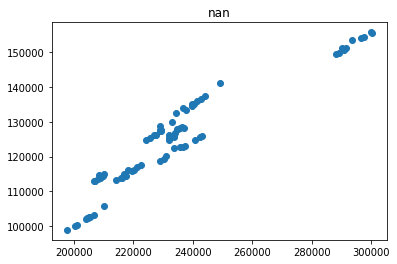

Iteration 432 | Cost: 0.000000 | theta nan nan


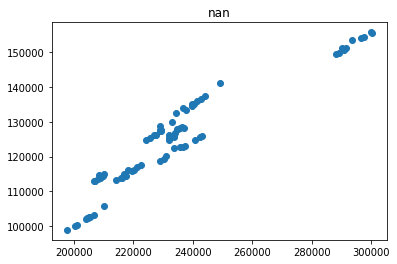

Iteration 433 | Cost: 0.000000 | theta nan nan


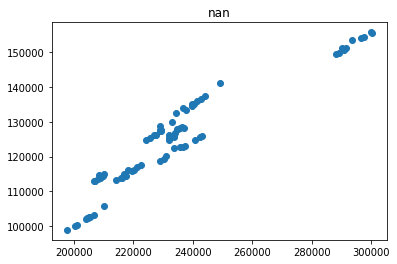

Iteration 434 | Cost: 0.000000 | theta nan nan


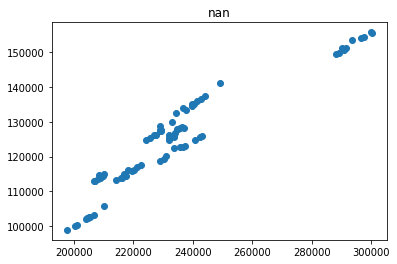

Iteration 435 | Cost: 0.000000 | theta nan nan


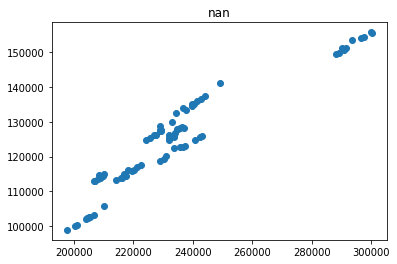

Iteration 436 | Cost: 0.000000 | theta nan nan


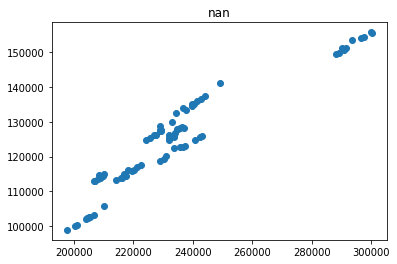

Iteration 437 | Cost: 0.000000 | theta nan nan


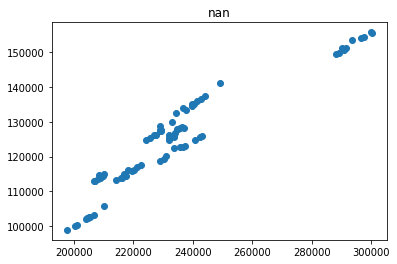

Iteration 438 | Cost: 0.000000 | theta nan nan


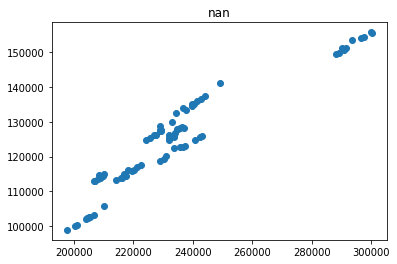

Iteration 439 | Cost: 0.000000 | theta nan nan


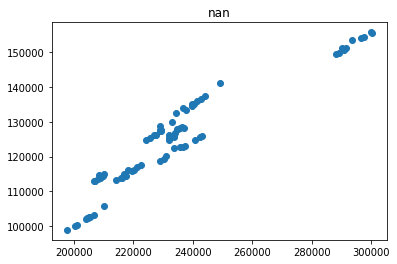

Iteration 440 | Cost: 0.000000 | theta nan nan


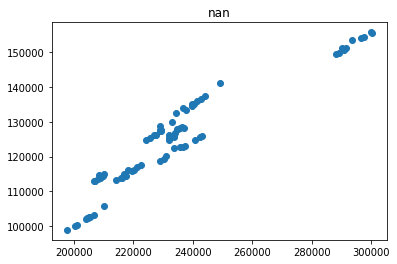

Iteration 441 | Cost: 0.000000 | theta nan nan


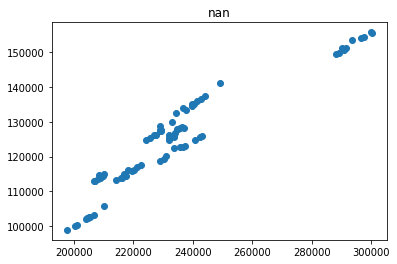

Iteration 442 | Cost: 0.000000 | theta nan nan


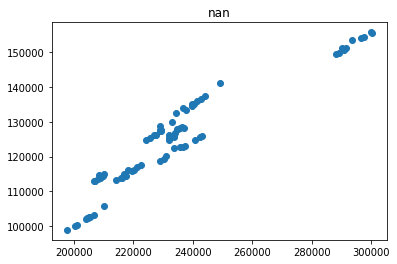

Iteration 443 | Cost: 0.000000 | theta nan nan


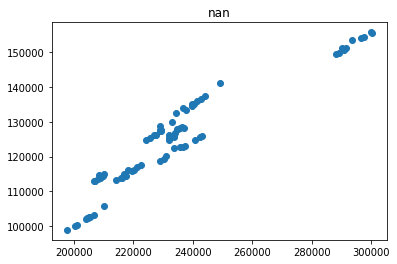

Iteration 444 | Cost: 0.000000 | theta nan nan


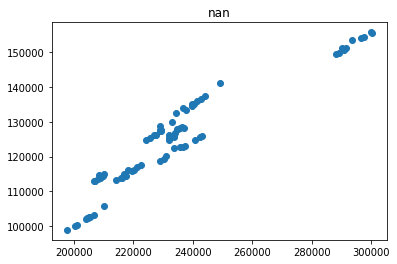

Iteration 445 | Cost: 0.000000 | theta nan nan


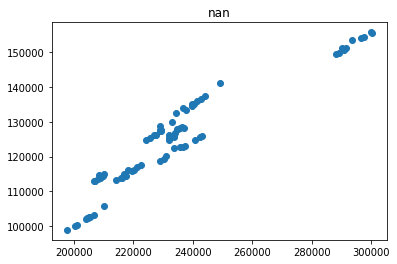

In [ ]:
print("Running...")
theta = gradientDescent(X, y, parameters, learning_rate, num_iterations)

# Sort the data in ascending wrt mean square error
costThetaList.sort(key=lambda x: x.cost, reverse=False)
print("After %d iterations b = %f, m = %f, error = %f" % (num_iterations, costThetaList[0].yIntercept, costThetaList[0].slope, costThetaList[0].cost))